# Notebook 2 - Exploratory Data Analysis

Note: The EDA for the first dataset is slightly more elaborate to avoid repition of general findings, e.g., on the deviation between columns.

__Import all libraries__

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Madrid Dataset

In [2]:
# Load the Madrid dataset
madrid_data = pd.read_csv('../../data/2_raw_idealista_data_incl_polygon/madrid_sale_with_polygon.csv')

__Structure of dataset__

In [3]:
# Total number of rows
madrid_total_rows = madrid_data.shape[0]
print(f"\nTotal number of rows in Madrid dataset: {madrid_total_rows}")

# Check data types
print("\nData types for Madrid dataset:")
print(madrid_data.dtypes)


Total number of rows in Madrid dataset: 94815

Data types for Madrid dataset:
ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN          

In [4]:
#Check for duplicates in rows
madrid_duplicate_rows = madrid_data.duplicated().sum()
print(f"\nNumber of duplicate rows in Madrid dataset: {madrid_duplicate_rows}")

#Check for duplicates in assets
madrid_duplicate_assets = madrid_data['ASSETID'].duplicated().sum()
madrid_duplicate_assets_percent = (madrid_duplicate_assets / len(madrid_data)) * 100
print(f"\nNumber of assets that appear more than once in Madrid dataset: {madrid_duplicate_assets}, making up {madrid_duplicate_assets_percent:.2f}% of the data")

assetid_counts_madrid = madrid_data['ASSETID'].value_counts()
max_assetid_occurrences_madrid = assetid_counts_madrid.max()
max_assetid_madrid = assetid_counts_madrid.idxmax()
print(f"\nMaximum number of times an ASSETID appears in the Madrid dataset: {max_assetid_occurrences_madrid}")
print(f"ASSETID with the maximum occurrences in Madrid dataset: {max_assetid_madrid}")


Number of duplicate rows in Madrid dataset: 0

Number of assets that appear more than once in Madrid dataset: 19011, making up 20.05% of the data

Maximum number of times an ASSETID appears in the Madrid dataset: 11
ASSETID with the maximum occurrences in Madrid dataset: A5463639993615125363


In [5]:
#Inspect asset with highest number of occurrences
asset_max_counts = madrid_data[madrid_data['ASSETID'] == 'A5463639993615125363']
asset_max_counts

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
7902   A5463639993615125363  201803  207000.0  3450.000000               60   
19938  A5463639993615125363  201803  202000.0  3884.615385               52   
24653  A5463639993615125363  201803  234000.0  4500.000000               52   
24781  A5463639993615125363  201803  238000.0  4576.923077               52   
62532  A5463639993615125363  201803  199000.0  3316.666667               60   
81495  A5463639993615125363  201803  194000.0  3233.333333               60   
87467  A5463639993615125363  201803  211000.0  3516.666667               60   
87710  A5463639993615125363  201803  205000.0  3416.666667               60   
93897  A5463639993615125363  201803  230000.0  4423.076923               52   
94239  A5463639993615125363  201803  191000.0  3673.076923               52   
94714  A5463639993615125363  201803  201000.0  3865.384615               52   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  ...  \
7902            1           1           1        1                   1  ...   
19938           1           1           1        1                   1  ...   
24653           1           1           1        1                   1  ...   
24781           1           1           1        1                   1  ...   
62532           1           1           1        1                   1  ...   
81495           1           1           1        1                   1  ...   
87467           1           1           1        1                   1  ...   
87710           1           1           1        1                   1  ...   
93897           1           1           1        1                   1  ...   
94239           1           1           1        1                   1  ...   
94714           1           1           1        1                   1  ...   

       BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
7902               0              0              1                 5.392542   
19938              0              0              1                 5.374193   
24653              0              0              1                 5.374691   
24781              0              0              1                 5.363078   
62532              0              0              1                 5.303509   
81495              0              0              1                 5.385101   
87467              0              0              1                 5.390419   
87710              0              0              1                 5.311837   
93897              0              0              1                 5.357351   
94239              0              0              1                 5.308797   
94714              0              0              1                 5.365288   

       DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  \
7902            0.194499                3.692020  -3.645034  40.435193   
19938           0.219450                3.662329  -3.645402  40.435435   
24653           0.214582                3.669458  -3.645306  40.435273   
24781           0.223212                3.674607  -3.645220  40.434841   
62532           0.174841                3.617161  -3.645890  40.434675   
81495           0.201676                3.685824  -3.645105  40.435148   
87467           0.195707                3.694490  -3.644998  40.435077   
87710           0.213050                3.603369  -3.646084  40.435224   
93897           0.227274                3.665850  -3.645326  40.434904   
94239           0.198981                3.607529  -3.646023  40.435044   
94714           0.231545                3.649768  -3.645556  40.435506   

                                         geometry  neighborhood  
7902   POINT (-3.64503442112256 40.4351934781573)      Quintana  
19938  POINT (-3.64540222352936 40.4354346692211)  Pueblo Nuevo  
24653  POINT (-3.64530635637155 40.4352730418263)      Quintana  
24781  POINT (-3.645

In [6]:
#Check whether there are assets that appear in more than one period
asset_period_counts = madrid_data.groupby('ASSETID')['PERIOD'].nunique()

asset_multiple_periods = asset_period_counts[asset_period_counts > 1]

if not asset_multiple_periods.empty:
    print("ASSETIDs with more than one PERIOD:")
    print(asset_multiple_periods)
else:
    print("No ASSETIDs with more than one PERIOD.")

No ASSETIDs with more than one PERIOD.


__Summary statistics and distributions__

In [7]:
# Generate summary statistics for numerical features
numerical_summary = madrid_data.describe()
print("\nSummary statistics for numerical features in Madrid dataset:")
print(numerical_summary)

# Generate summary statistics for categorical features
categorical_features = madrid_data.select_dtypes(include=['object']).columns

categorical_summary = {}
for column in categorical_features:
    categorical_summary[column] = madrid_data[column].value_counts()

print("\nSummary statistics for categorical features in Madrid dataset:")
for column, summary in categorical_summary.items():
    print(f"\nColumn: {column}")
    print(summary)


Summary statistics for numerical features in Madrid dataset:
              PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   94815.000000  9.481500e+04  94815.000000     94815.000000   
mean   201808.613289  3.961101e+05   3661.051534       101.397163   
std         3.684625  4.170744e+05   1700.499398        67.078259   
min    201803.000000  2.100000e+04    805.309735        21.000000   
25%    201806.000000  1.600000e+05   2240.000000        62.000000   
50%    201809.000000  2.620000e+05   3480.000000        83.000000   
75%    201812.000000  4.670000e+05   4744.623034       117.000000   
max    201812.000000  8.133000e+06   9997.560976       985.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  94815.000000  94815.000000  94815.000000  94815.000000   
mean       2.580900      1.585456      0.355260      0.695597   
std        1.244878      0.843024      0.478595      0.460157   
min        0.000000      0.000000      0.000000      0.0


Histograms for numerical values in Madrid dataset:


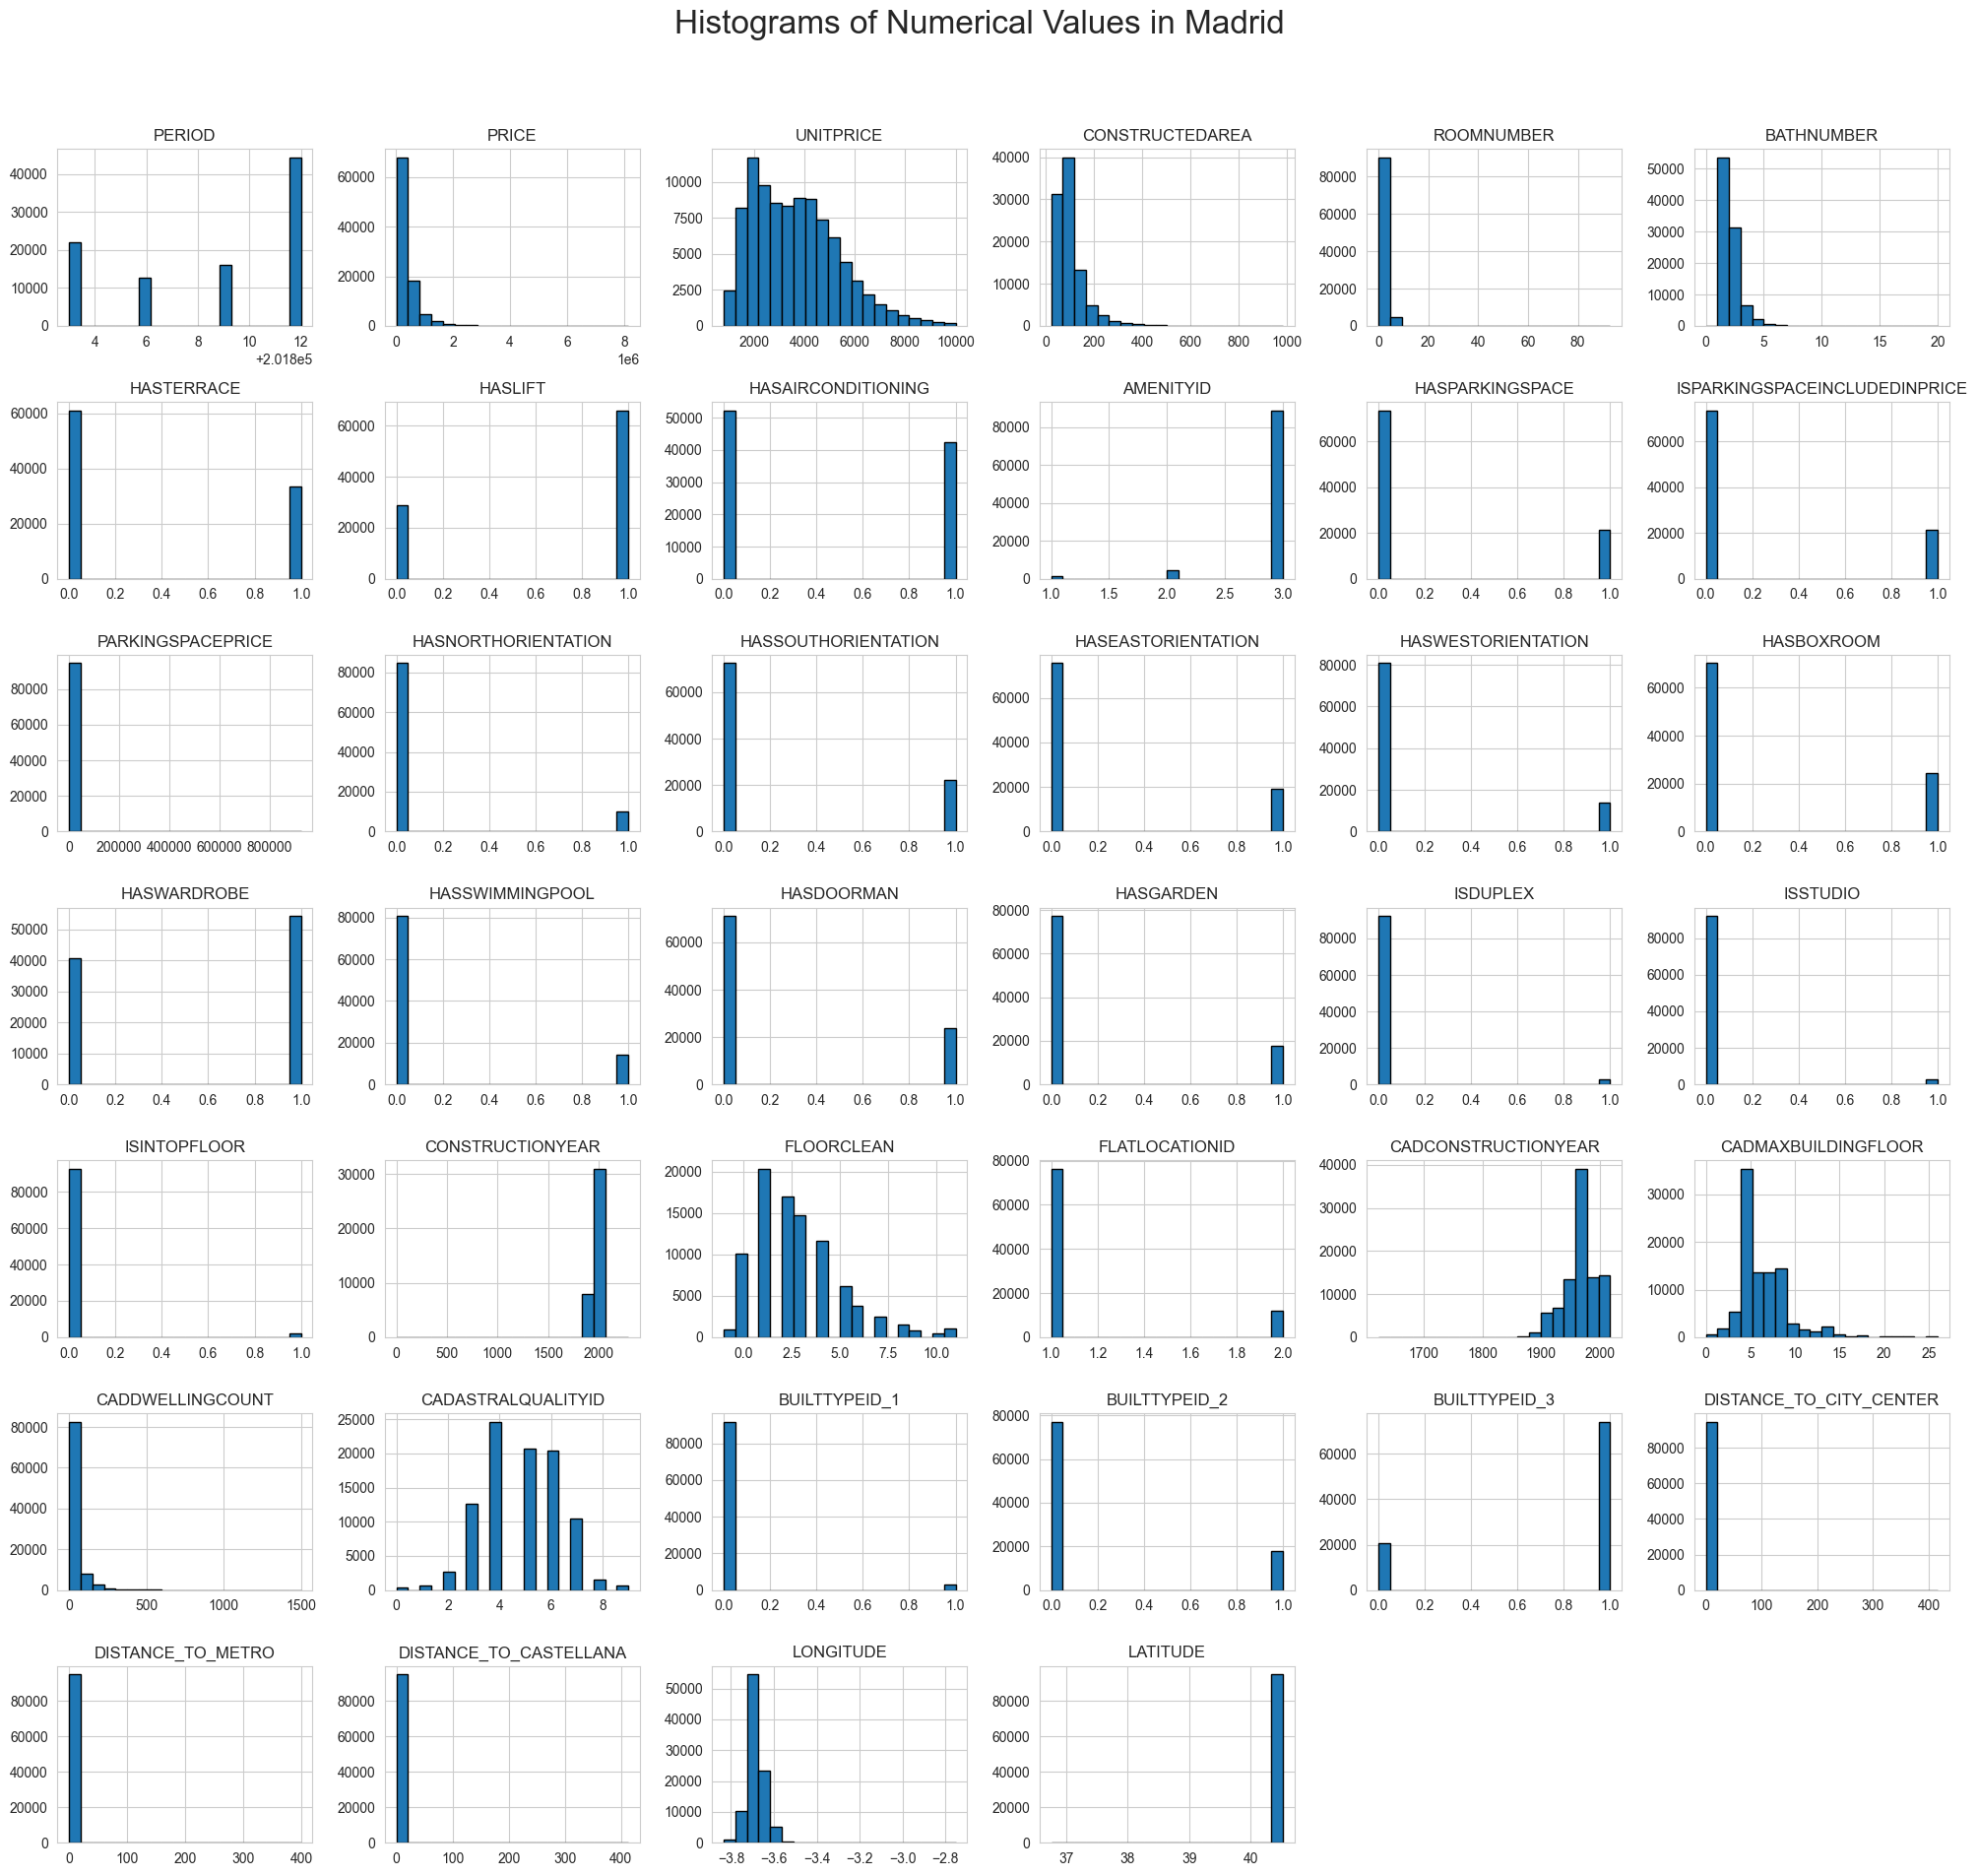

In [8]:
# Histograms of numerical values
print("\nHistograms for numerical values in Madrid dataset:")
madrid_numerical_columns = madrid_data.select_dtypes(include=['float64', 'int64']).columns

madrid_data[madrid_numerical_columns].hist(figsize=(20, 20), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Values in Madrid", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

__Outlier identification__

In [9]:
# Function to identify outliers, count them for each column, and calculate percentages
def count_outliers(df):
    outlier_counts = {}
    outlier_percentages = {}
    total_outliers = 0
    total_rows = len(df)
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_counts[column] = outlier_count
        outlier_percentages[column] = (outlier_count / total_rows) * 100
        total_outliers += outlier_count
    
    outlier_counts['Total'] = total_outliers
    outlier_percentages['Total'] = (total_outliers / total_rows) * 100
    
    outliers_df = pd.DataFrame({
        'Number of Outliers': pd.Series(outlier_counts),
        'Percentage': pd.Series(outlier_percentages)
    })
    
    # Sort by percentage in descending order
    return outliers_df.sort_values(by='Percentage', ascending=False)

# Count outliers in Madrid dataset
madrid_outlier_counts = count_outliers(madrid_data)

# Display the number of outliers and percentages for each column
print("\nNumber of outliers for each column in Madrid dataset:")
print(madrid_outlier_counts)



Number of outliers for each column in Madrid dataset:
                               Number of Outliers  Percentage
Total                                      299474  315.850867
HASDOORMAN                                  23664   24.958076
HASSOUTHORIENTATION                         22388   23.612298
HASPARKINGSPACE                             21343   22.510151
ISPARKINGSPACEINCLUDEDINPRICE               21343   22.510151
BUILTTYPEID_3                               20571   21.695934
HASEASTORIENTATION                          19213   20.263671
BUILTTYPEID_2                               17689   18.656331
HASGARDEN                                   17496   18.452776
HASWESTORIENTATION                          14076   14.845752
HASSWIMMINGPOOL                             14048   14.816221
FLATLOCATIONID                              12104   12.765913
CADDWELLINGCOUNT                            10855   11.448610
HASNORTHORIENTATION                         10223   10.782049
ROOMNUMBER     

In [10]:
#Counts of highest and lowest values for numerical & categorical columns
columns_to_count = [
    'CADDWELLINGCOUNT', 'ROOMNUMBER', 'CONSTRUCTEDAREA', 'DISTANCE_TO_METRO', 
    'PRICE', 'CADCONSTRUCTIONYEAR', 'AMENITYID', 'LONGITUDE', 
    'CADMAXBUILDINGFLOOR', 'BATHNUMBER', 
    'CONSTRUCTIONYEAR', 'CADCONSTRUCTIONYEAR', 'FLOORCLEAN', 'PARKINGSPACEPRICE', 'UNITPRICE', 
    'DISTANCE_TO_CITY_CENTER', 'CADASTRALQUALITYID', 'LATITUDE'
]

# Get value counts for each column, sorted by the variable values in descending order
value_counts_madrid = {column: madrid_data[column].value_counts().sort_index(ascending=False) for column in columns_to_count}

# Print the value counts for each column
for column, value_counts in value_counts_madrid.items():
    print(f"Value counts for {column}:\n")
    print(value_counts)
    print("\n" + "="*50 + "\n")

Value counts for CADDWELLINGCOUNT:

CADDWELLINGCOUNT
1499       2
724       23
701        1
638        4
574       55
        ... 
5       1477
4       1402
3       1126
2       1087
1        691
Name: count, Length: 329, dtype: int64


Value counts for ROOMNUMBER:

ROOMNUMBER
93        1
33        1
20        2
18        2
16        2
15        3
14        5
13        6
12       18
11       16
10       24
9        35
8       142
7       279
6       789
5      3350
4     11674
3     33961
2     28422
1     13338
0      2745
Name: count, dtype: int64


Value counts for CONSTRUCTEDAREA:

CONSTRUCTEDAREA
985      1
982      1
951      1
950      1
941      2
      ... 
25     235
24      74
23      54
22      61
21      58
Name: count, Length: 558, dtype: int64


Value counts for DISTANCE_TO_METRO:

DISTANCE_TO_METRO
399.477366    1
9.425214      1
9.374054      1
9.355168      1
9.344541      1
             ..
0.004133      1
0.004018      1
0.003159      1
0.002589      1
0.001416      

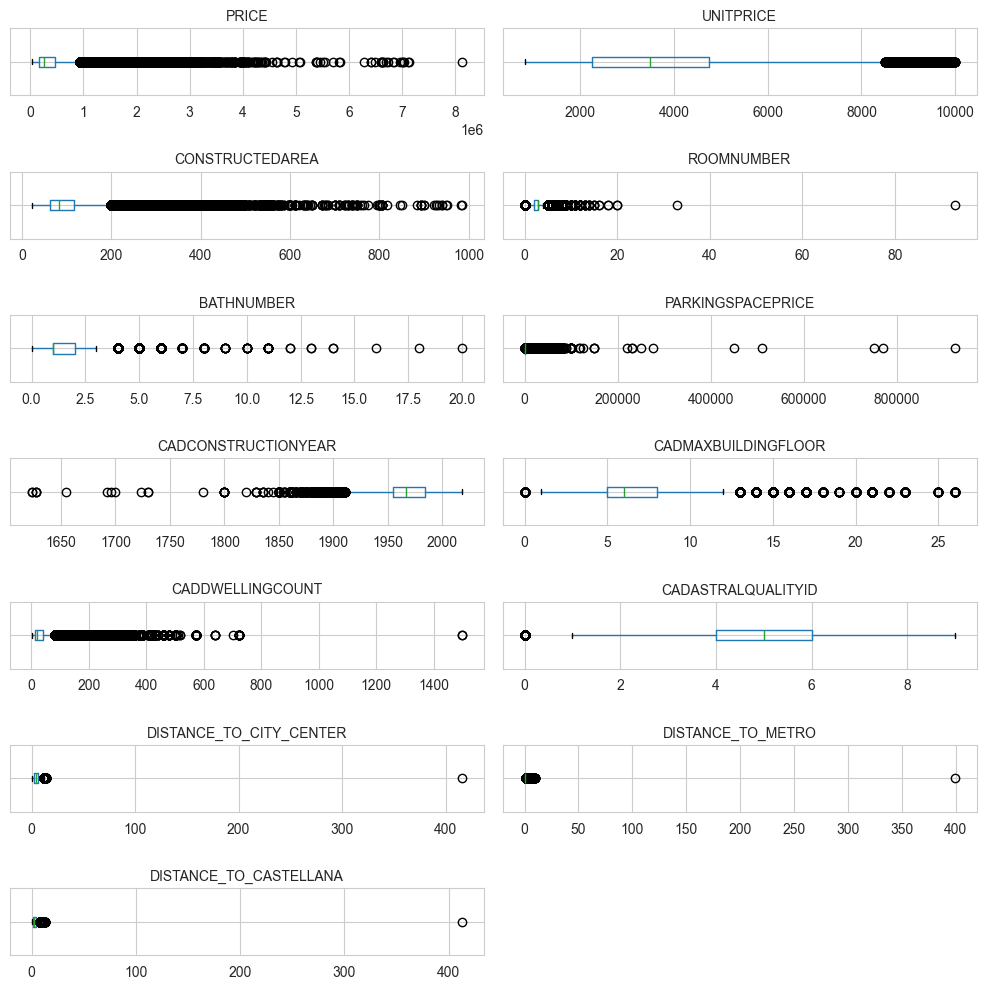

In [11]:
#Boxplots for all continous variables

# Select relevant columns
boxplot_columns_madrid = [
    'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 
    'PARKINGSPACEPRICE', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 
    'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'DISTANCE_TO_CITY_CENTER', 
    'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA'
]

# Filter the DataFrame to include only the selected columns
madrid_selected_data = madrid_data[boxplot_columns_madrid]

# Number of plots
num_plots = len(boxplot_columns_madrid)

# Plotting boxplots for each selected column
plt.figure(figsize=(10, 10))

# Create subplots with 2 columns
for i, column in enumerate(boxplot_columns_madrid, 1):
    ax = plt.subplot((num_plots + 1) // 2, 2, i)
    madrid_selected_data.boxplot(column=column, vert=False, ax=ax)
    ax.set_title(column, fontsize=10)
    ax.set_yticklabels([])  # Remove the y-axis labels
    plt.grid(True)

plt.tight_layout()
plt.show()

__Missing values__

In [12]:
# Check for missing values
madrid_missing_values = madrid_data.isnull().sum()
madrid_missing_percent = (madrid_missing_values / len(madrid_data)) * 100

# Create a DataFrame to display the count and percentage of missing values
madrid_missing_data = pd.DataFrame({
    'Missing Values': madrid_missing_values,
    'Percentage': madrid_missing_percent
})

# Filter to show only rows with missing values
madrid_missing_data = madrid_missing_data[madrid_missing_data['Missing Values'] > 0]

print("\nMissing values in Madrid dataset:")
print(madrid_missing_data)


Missing values in Madrid dataset:
                    Missing Values  Percentage
CONSTRUCTIONYEAR             55873   58.928440
FLOORCLEAN                    3846    4.056320
FLATLOCATIONID                6387    6.736276
CADASTRALQUALITYID               1    0.001055
neighborhood                    94    0.099140


__Correlation between variables__


Correlation matrix for Madrid dataset:


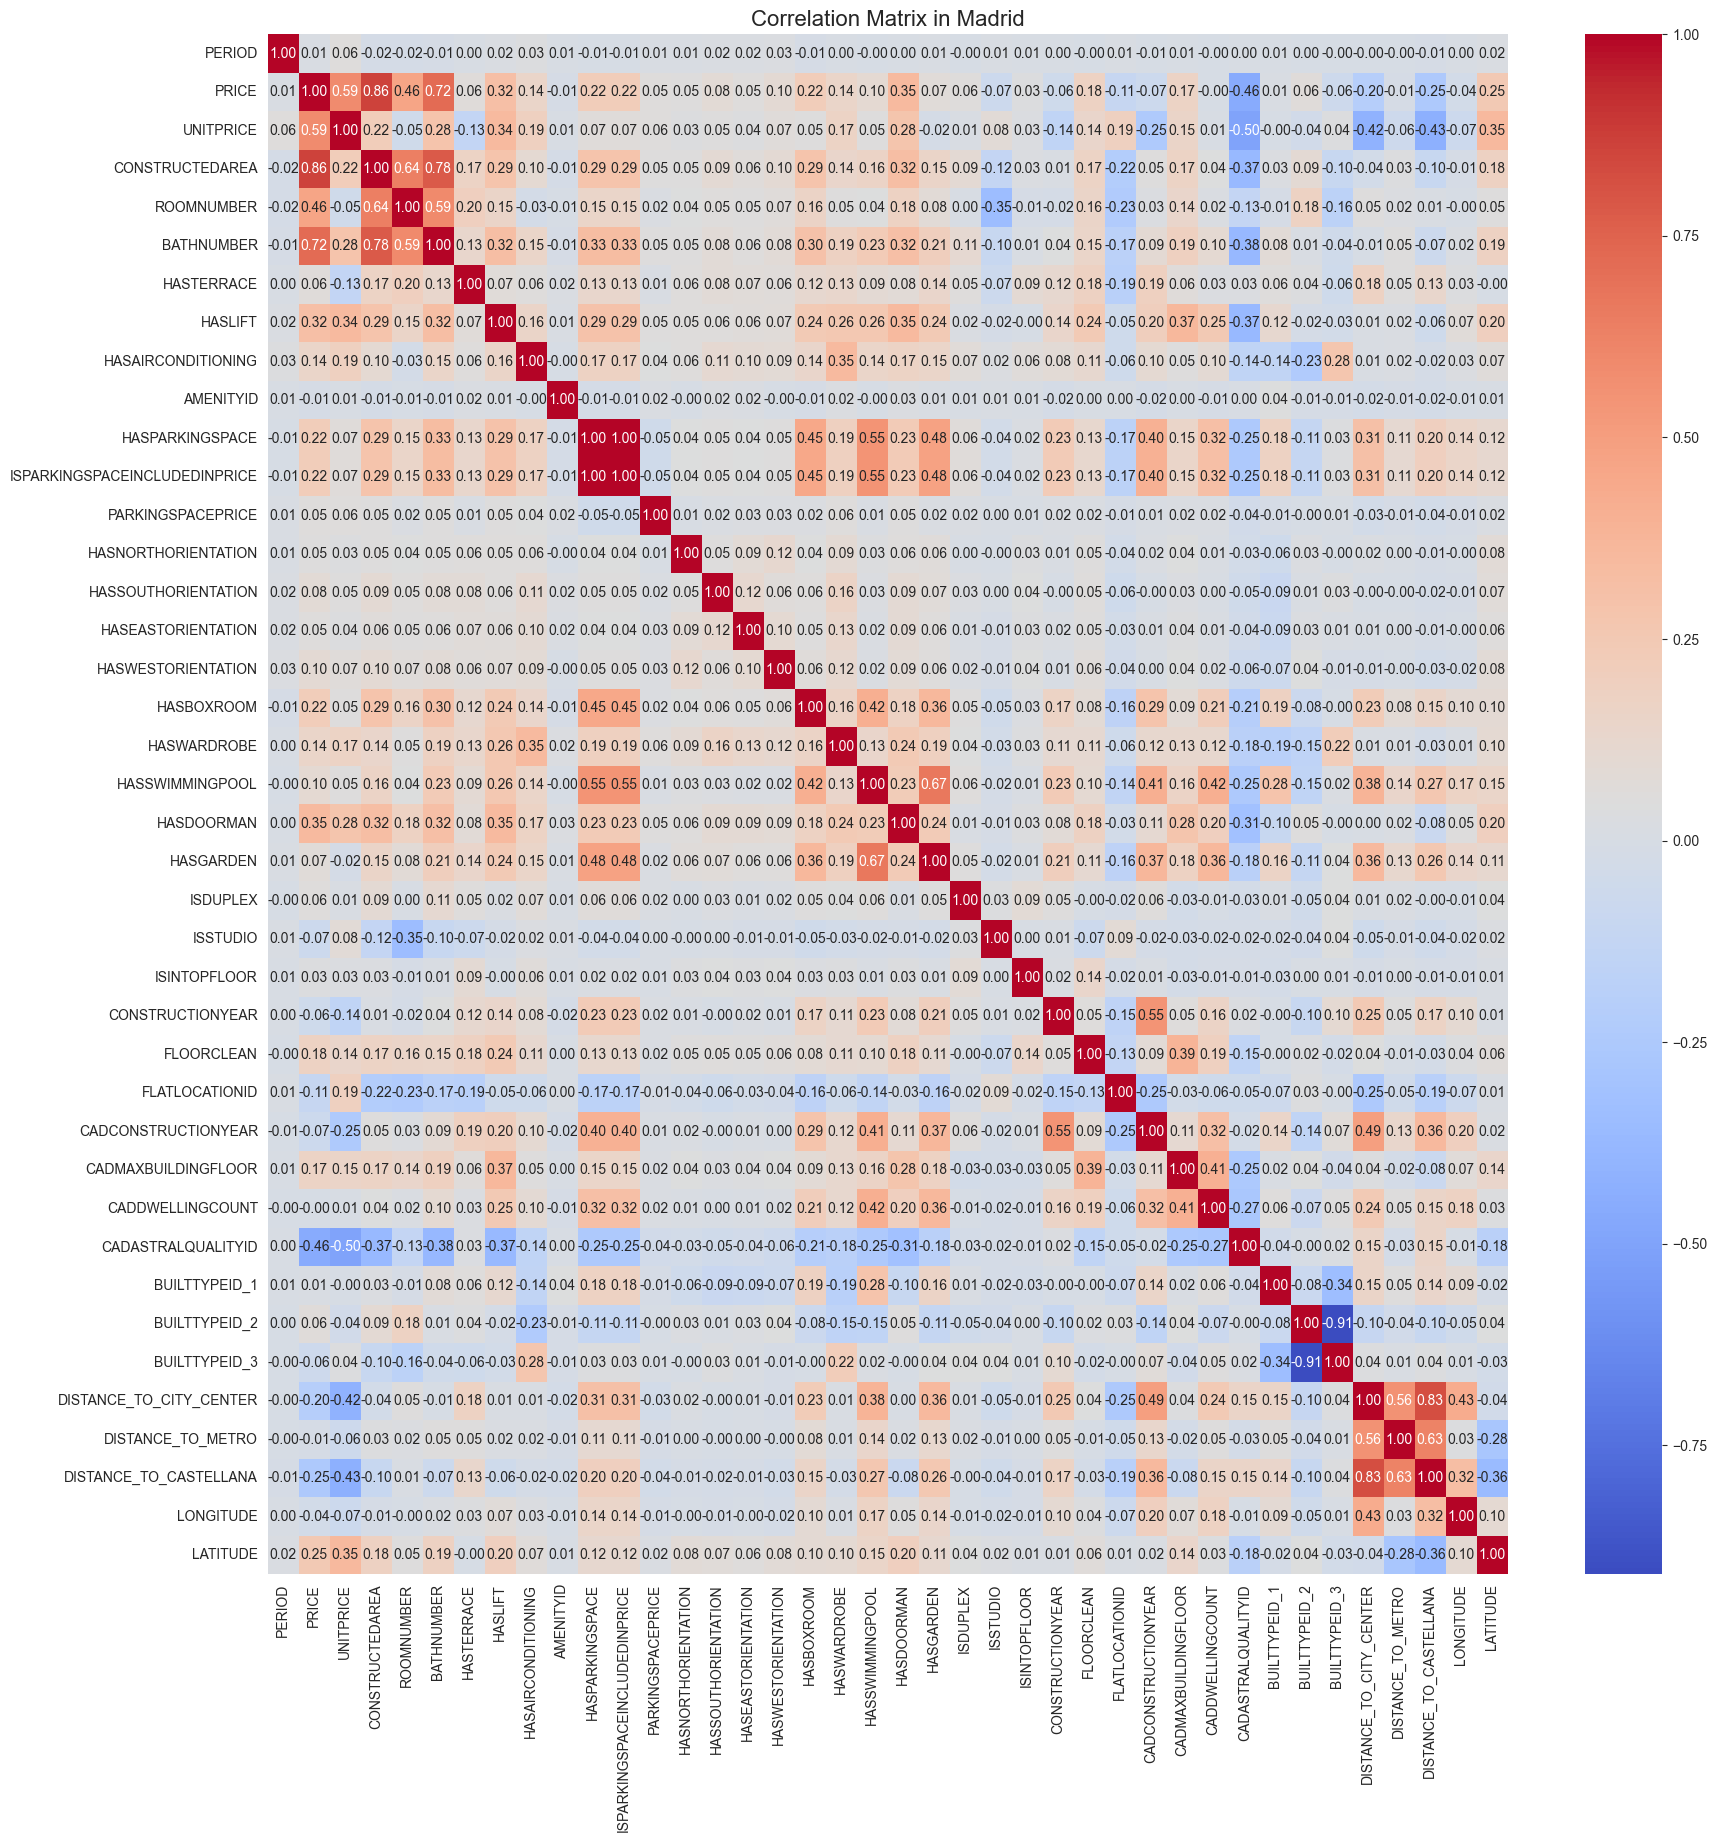

In [13]:
# Correlation matrix
print("\nCorrelation matrix for Madrid dataset:")
madrid_correlation_matrix = madrid_data[madrid_numerical_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(madrid_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Madrid", fontsize=16)
plt.show()

__Check whether boolean columns on parking are equal to each other (given correlation of 1.0)__

In [14]:
#Count number of times the column HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same
madrid_data['IsSame'] = madrid_data['HASPARKINGSPACE'] == madrid_data['ISPARKINGSPACEINCLUDEDINPRICE']
not_same_count = (~madrid_data['IsSame']).sum()

print(f'Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: {not_same_count}')

# Drop auxiliary column
madrid_data = madrid_data.drop(columns=['IsSame'])

Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: 0


__Added for Madrid only to reduce repetition__

Analysis of relation between PRICE, UNITPRICE, CONSTRUCTEDAREA

In [15]:
#Count number of times where UNITPRICE deviates from PRICE divided by CONSTRUCTEDAREA
madrid_data['EXPECTED_UNITPRICE'] = madrid_data['PRICE'] / madrid_data['CONSTRUCTEDAREA'].astype(float)
madrid_data['DEVIATION'] = (madrid_data['UNITPRICE'] - madrid_data['EXPECTED_UNITPRICE']).abs()
unitprice_mismatches = (madrid_data['UNITPRICE'] != madrid_data['EXPECTED_UNITPRICE']).sum()
print(f"The number of times UNITPRICE is not the result of PRICE / CONSTRUCTEDAREA: {unitprice_mismatches}")

# Find top 3 rows with the maximum deviations
top_3_deviations = madrid_data.nlargest(3, 'DEVIATION')
print("\nTop 3 rows with the maximum deviations:")
print(top_3_deviations[['PRICE', 'CONSTRUCTEDAREA', 'UNITPRICE', 'EXPECTED_UNITPRICE', 'DEVIATION']])

#Drop  columns no longer needed
madrid_data.drop(columns=['EXPECTED_UNITPRICE', 'DEVIATION'], inplace=True)

The number of times UNITPRICE is not the result of PRICE / CONSTRUCTEDAREA: 74813

Top 3 rows with the maximum deviations:
           PRICE  CONSTRUCTEDAREA    UNITPRICE  EXPECTED_UNITPRICE  \
2762    471000.0               58  8120.689655         8120.689655   
21461   397000.0               59  6728.813559         6728.813559   
26878  1284000.0              230  5582.608696         5582.608696   

          DEVIATION  
2762   6.366463e-12  
21461  6.366463e-12  
26878  6.366463e-12  


Analysis of the two columns about construction year

In [16]:
# Count the number of times the values are not equal
count_not_equal = (madrid_data['CADCONSTRUCTIONYEAR'] != madrid_data['CONSTRUCTIONYEAR']).sum()
print(f"The number of times CADCONSTRUCTIONYEAR is not equal to CONSTRUCTIONYEAR: {count_not_equal}")

# Calculate the maximum deviation
max_deviation = (madrid_data['CADCONSTRUCTIONYEAR'] - madrid_data['CONSTRUCTIONYEAR']).abs().max()
print(f"The maximum deviation between CADCONSTRUCTIONYEAR and CONSTRUCTIONYEAR: {max_deviation}")

deviation_above_10 = (madrid_data['CADCONSTRUCTIONYEAR'] - madrid_data['CONSTRUCTIONYEAR']).abs() > 10
rows_with_high_deviation = madrid_data[deviation_above_10]
print("Rows where the deviation is above 10 years:")
rows_with_high_deviation

The number of times CADCONSTRUCTIONYEAR is not equal to CONSTRUCTIONYEAR: 56351
The maximum deviation between CADCONSTRUCTIONYEAR and CONSTRUCTIONYEAR: 2001.0
Rows where the deviation is above 10 years:


ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
5220    A4337045650772792862  201803  436000.0  4360.000000              100   
6019     A998118547715878940  201803   90000.0  1800.000000               50   
6316    A8656029059824902455  201803  231000.0  2483.870968               93   
6542    A4554705208923633996  201803  180000.0  2400.000000               75   
7196   A15807888384771655345  201803  187000.0  2174.418605               86   
...                      ...     ...       ...          ...              ...   
94441   A1002338115201630276  201812  278000.0  2725.490196              102   
94459  A16926275709456619103  201812  173000.0  1647.619048              105   
94688   A5238898645417116191  201803  107000.0  1671.875000               64   
94702  A14182605209221930513  201812  171000.0  2948.275862               58   
94797   A7992941834952423190  201806  188000.0  2186.046512               86   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  ...  \
5220            3           2           0        1                   1  ...   
6019            2           1           0        0                   0  ...   
6316            3           2           0        1                   0  ...   
6542            1           1           0        1                   0  ...   
7196            2           2           0        1                   1  ...   
...           ...         ...         ...      ...                 ...  ...   
94441           3           2           0        1                   1  ...   
94459           3           1           0        1                   1  ...   
94688           3           1           0        1                   0  ...   
94702           2           1           0        1                   0  ...   
94797           2           1           1        0                   1  ...   

       BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
5220               0              0              1                10.189911   
6019               0              1              0                 2.533210   
6316               0              0              1                 5.202500   
6542               0              0              1                 6.134146   
7196               0              0              1                 4.149727   
...              ...            ...            ...                      ...   
94441              0              0              1                 7.137998   
94459              0              0              1                 6.494119   
94688              0              0              1                 5.748434   
94702              0              0              1                 4.728042   
94797              0              0              1                 7.335540   

       DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  \
5220            0.740694                2.682983  -3.677614  40.505935   
6019            0.391385                1.526679  -3.712697  40.394868   
6316            0.436149                4.444569  -3.746419  40.382971   
6542            0.292038                5.012189  -3.749890  40.374119   
7196            0.745927                2.180346  -3.669323  40.390118   
...                  ...                     ...        ...        ...   
94441           0.544614                4.193983  -3.687393  40.353696   
94459           0.220905                3.602155  -3.695874  40.358565   
94688           0.078358                4.151320  -3.646071  40.389485   
94702           0.434700                3.159912  -3.651374  40.431140   
94797           0.604741                4.387782  -3.685717  40.352148   

                                         geometry               neighborhood  
5220   POINT (-3.67761400666444 40.5059347081388)                 Las Tablas  
6019   POINT (-3.71269713606379 40.3948680666317)                   Comillas  
6316   POINT (-3.74641869940306 40.3

__Analyze distribution of price for different clusters__

Average price per cluster:
Cluster
2    1.049108e+06
0    3.456578e+05
3    2.701431e+05
1    2.582428e+05
4    1.910000e+05
Name: PRICE, dtype: float64


<Figure size 1500x1000 with 0 Axes>

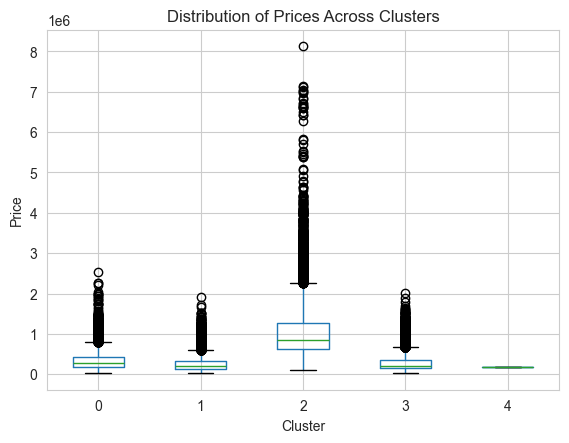


Cluster characteristics:
         CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  DISTANCE_TO_METRO  \
Cluster                                                               
0              71.129550    1.837889    1.252929           0.246895   
1              94.806955    2.641797    1.574448           0.859146   
2             214.368328    4.247487    2.936146           0.384538   
3              78.818902    2.277211    1.270404           0.398331   
4             145.000000    4.000000    2.000000         399.477366   

         CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  DISTANCE_TO_CITY_CENTER  \
Cluster                                                                      
0                1920.000567             5.654490                 1.847658   
1                1986.593881             6.695273                 8.058623   
2                1962.868469             8.143282                 3.468807   
3                1972.928374             5.901866                 3.977426   
4       

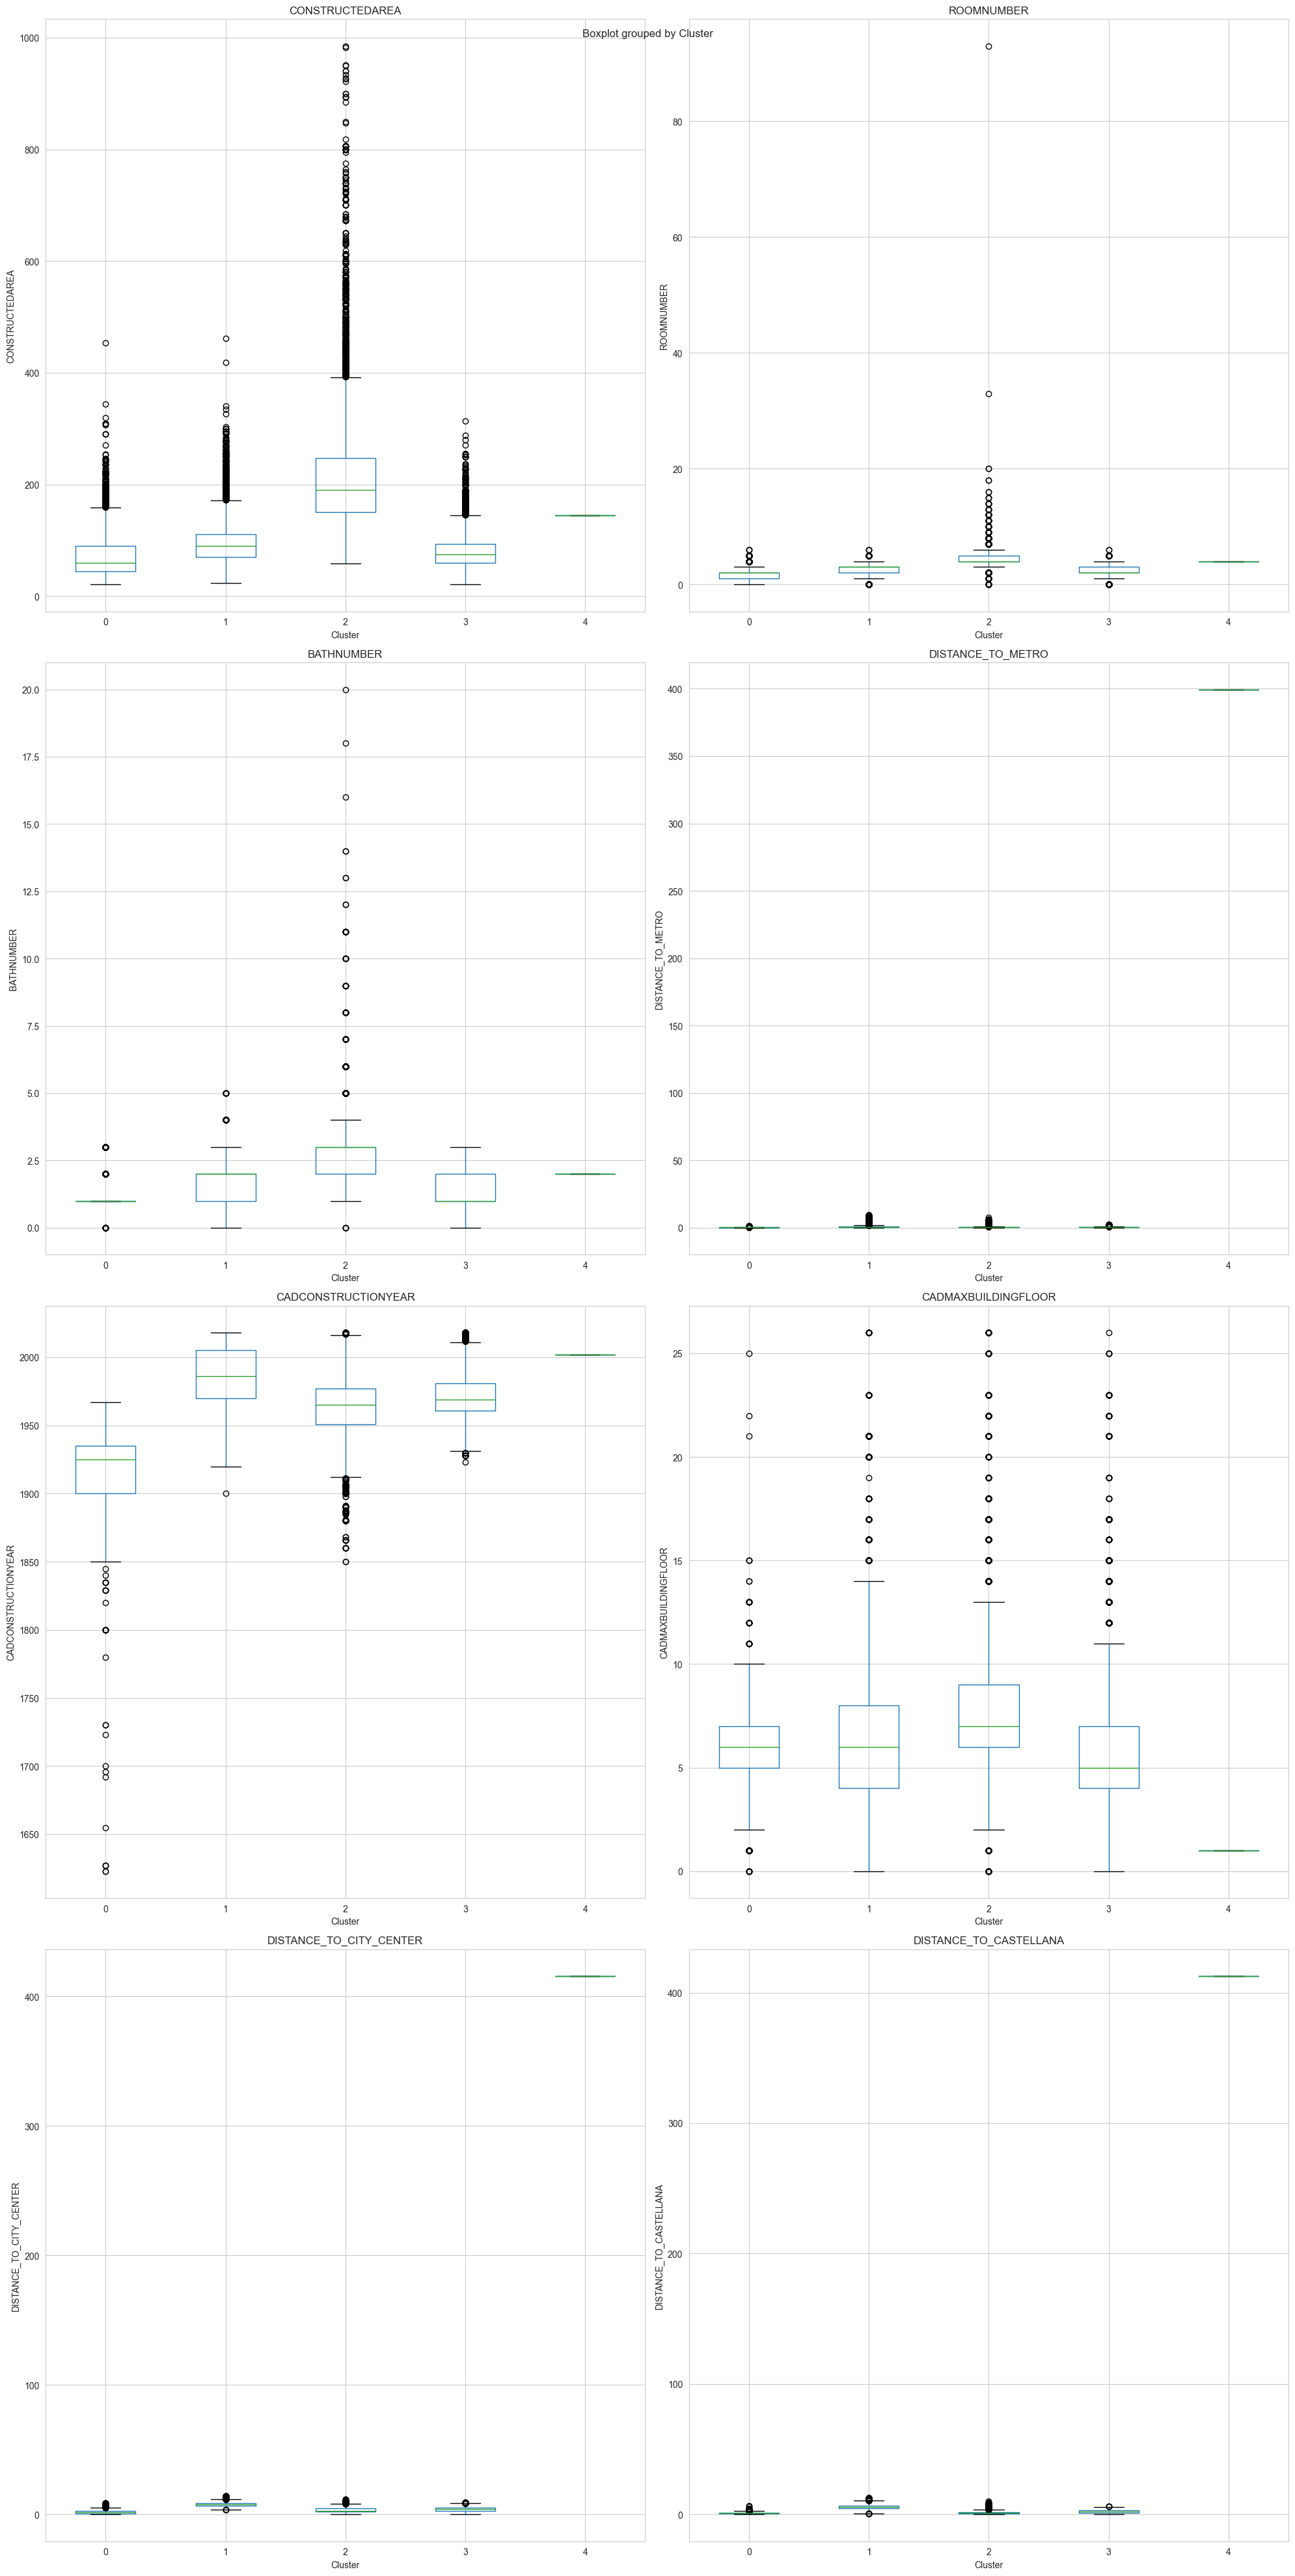

In [46]:
# Select relevant features for clustering
relevant_features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'DISTANCE_TO_METRO',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'DISTANCE_TO_CITY_CENTER',
    'DISTANCE_TO_CASTELLANA'
]

# Create a copy of the dataset with only the selected features
cluster_data = madrid_data[relevant_features].copy()

# Handle missing values (if any)
cluster_data = cluster_data.fillna(cluster_data.mean())

# Standardize the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the original dataset
madrid_data['Cluster'] = cluster_labels

# Calculate average price for each cluster
cluster_prices = madrid_data.groupby('Cluster')['PRICE'].mean().sort_values(ascending=False)

print("Average price per cluster:")
print(cluster_prices)

# Visualize clusters using boxplots
plt.figure(figsize=(15, 10))
madrid_data.boxplot(column='PRICE', by='Cluster')
plt.title('Distribution of Prices Across Clusters')
plt.suptitle('')  # This removes the automatic suptitle added by pandas
plt.ylabel('Price')
plt.show()

# Analyze cluster characteristics
cluster_summary = madrid_data.groupby('Cluster')[relevant_features + ['PRICE']].mean()
print("\nCluster characteristics:")
print(cluster_summary)

# Feature importance in clustering
feature_importance = pd.DataFrame({
    'Feature': relevant_features,
    'Importance': np.sum(np.abs(kmeans.cluster_centers_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature importance in clustering:")
print(feature_importance)

# Visualize all important features across clusters
fig, axes = plt.subplots(4, 2, figsize=(20, 40))
fig.suptitle('Distribution of Features Across Clusters', fontsize=16)

for i, feature in enumerate(relevant_features):
    row = i // 2
    col = i % 2
    madrid_data.boxplot(column=feature, by='Cluster', ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Valencia Dataset

In [18]:
# Load the Valencia dataset
valencia_data = pd.read_csv('../../data/2_raw_idealista_data_incl_polygon/valencia_sale_with_polygon.csv')

__Structure of the dataset__

In [19]:
# Total number of rows
valencia_total_rows = valencia_data.shape[0]
print(f"\nTotal number of rows in Valencia dataset: {valencia_total_rows}")

# Check data types
print("\nData types for Valencia dataset:")
print(valencia_data.dtypes)


Total number of rows in Valencia dataset: 33622

Data types for Valencia dataset:
ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN      

In [20]:
# Check for duplicates in rows
valencia_duplicate_rows = valencia_data.duplicated().sum()
print(f"\nNumber of duplicate rows in Valencia dataset: {valencia_duplicate_rows}")

#Check for duplicates in assets
valencia_duplicate_assets = valencia_data['ASSETID'].duplicated().sum()
valencia_duplicate_assets_percent = (valencia_duplicate_assets / len(valencia_data)) * 100
print(f"\nNumber of assets that appear more than once in Valencia dataset: {valencia_duplicate_assets}, making up {valencia_duplicate_assets_percent:.2f}% of the data")

assetid_counts_valencia = valencia_data['ASSETID'].value_counts()
max_assetid_occurrences_valencia = assetid_counts_valencia.max()
max_assetid_valencia = assetid_counts_valencia.idxmax()
print(f"\nMaximum number of times an ASSETID appears in the Valencia dataset: {max_assetid_occurrences_valencia}")
print(f"ASSETID with the maximum occurrences in Valencia dataset: {max_assetid_valencia}")


Number of duplicate rows in Valencia dataset: 0

Number of assets that appear more than once in Valencia dataset: 6231, making up 18.53% of the data

Maximum number of times an ASSETID appears in the Valencia dataset: 10
ASSETID with the maximum occurrences in Valencia dataset: A831406892725997119


__Summary statistics and distributions__

In [21]:
# Summary statistics for numerical features
numerical_summary = valencia_data.describe()
print("\nSummary statistics for numerical features in Valencia dataset:")
print(numerical_summary)

# Summary statistics for categorical features
categorical_features = valencia_data.select_dtypes(include=['object']).columns

categorical_summary = {}
for column in categorical_features:
    categorical_summary[column] = valencia_data[column].value_counts()

print("\nSummary statistics for categorical features in Valencia dataset:")
for column, summary in categorical_summary.items():
    print(f"\nColumn: {column}")
    print(summary)



Summary statistics for numerical features in Valencia dataset:
              PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   33622.000000  3.362200e+04  33622.000000     33622.000000   
mean   201808.174915  1.996783e+05   1714.535694       108.945780   
std         3.779048  1.771560e+05    850.807255        47.285144   
min    201803.000000  2.000000e+04    480.686695        24.000000   
25%    201803.000000  9.900000e+04   1112.500000        80.000000   
50%    201809.000000  1.510000e+05   1531.250000       100.000000   
75%    201812.000000  2.340000e+05   2114.285714       123.000000   
max    201812.000000  2.772000e+06   9421.818182       912.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  33622.000000  33622.000000  33622.000000  33622.000000   
mean       3.065761      1.585688      0.254714      0.790732   
std        1.085742      0.642585      0.435707      0.406792   
min        0.000000      0.000000      0.000000      0


Histograms for numerical values in Valencia dataset:


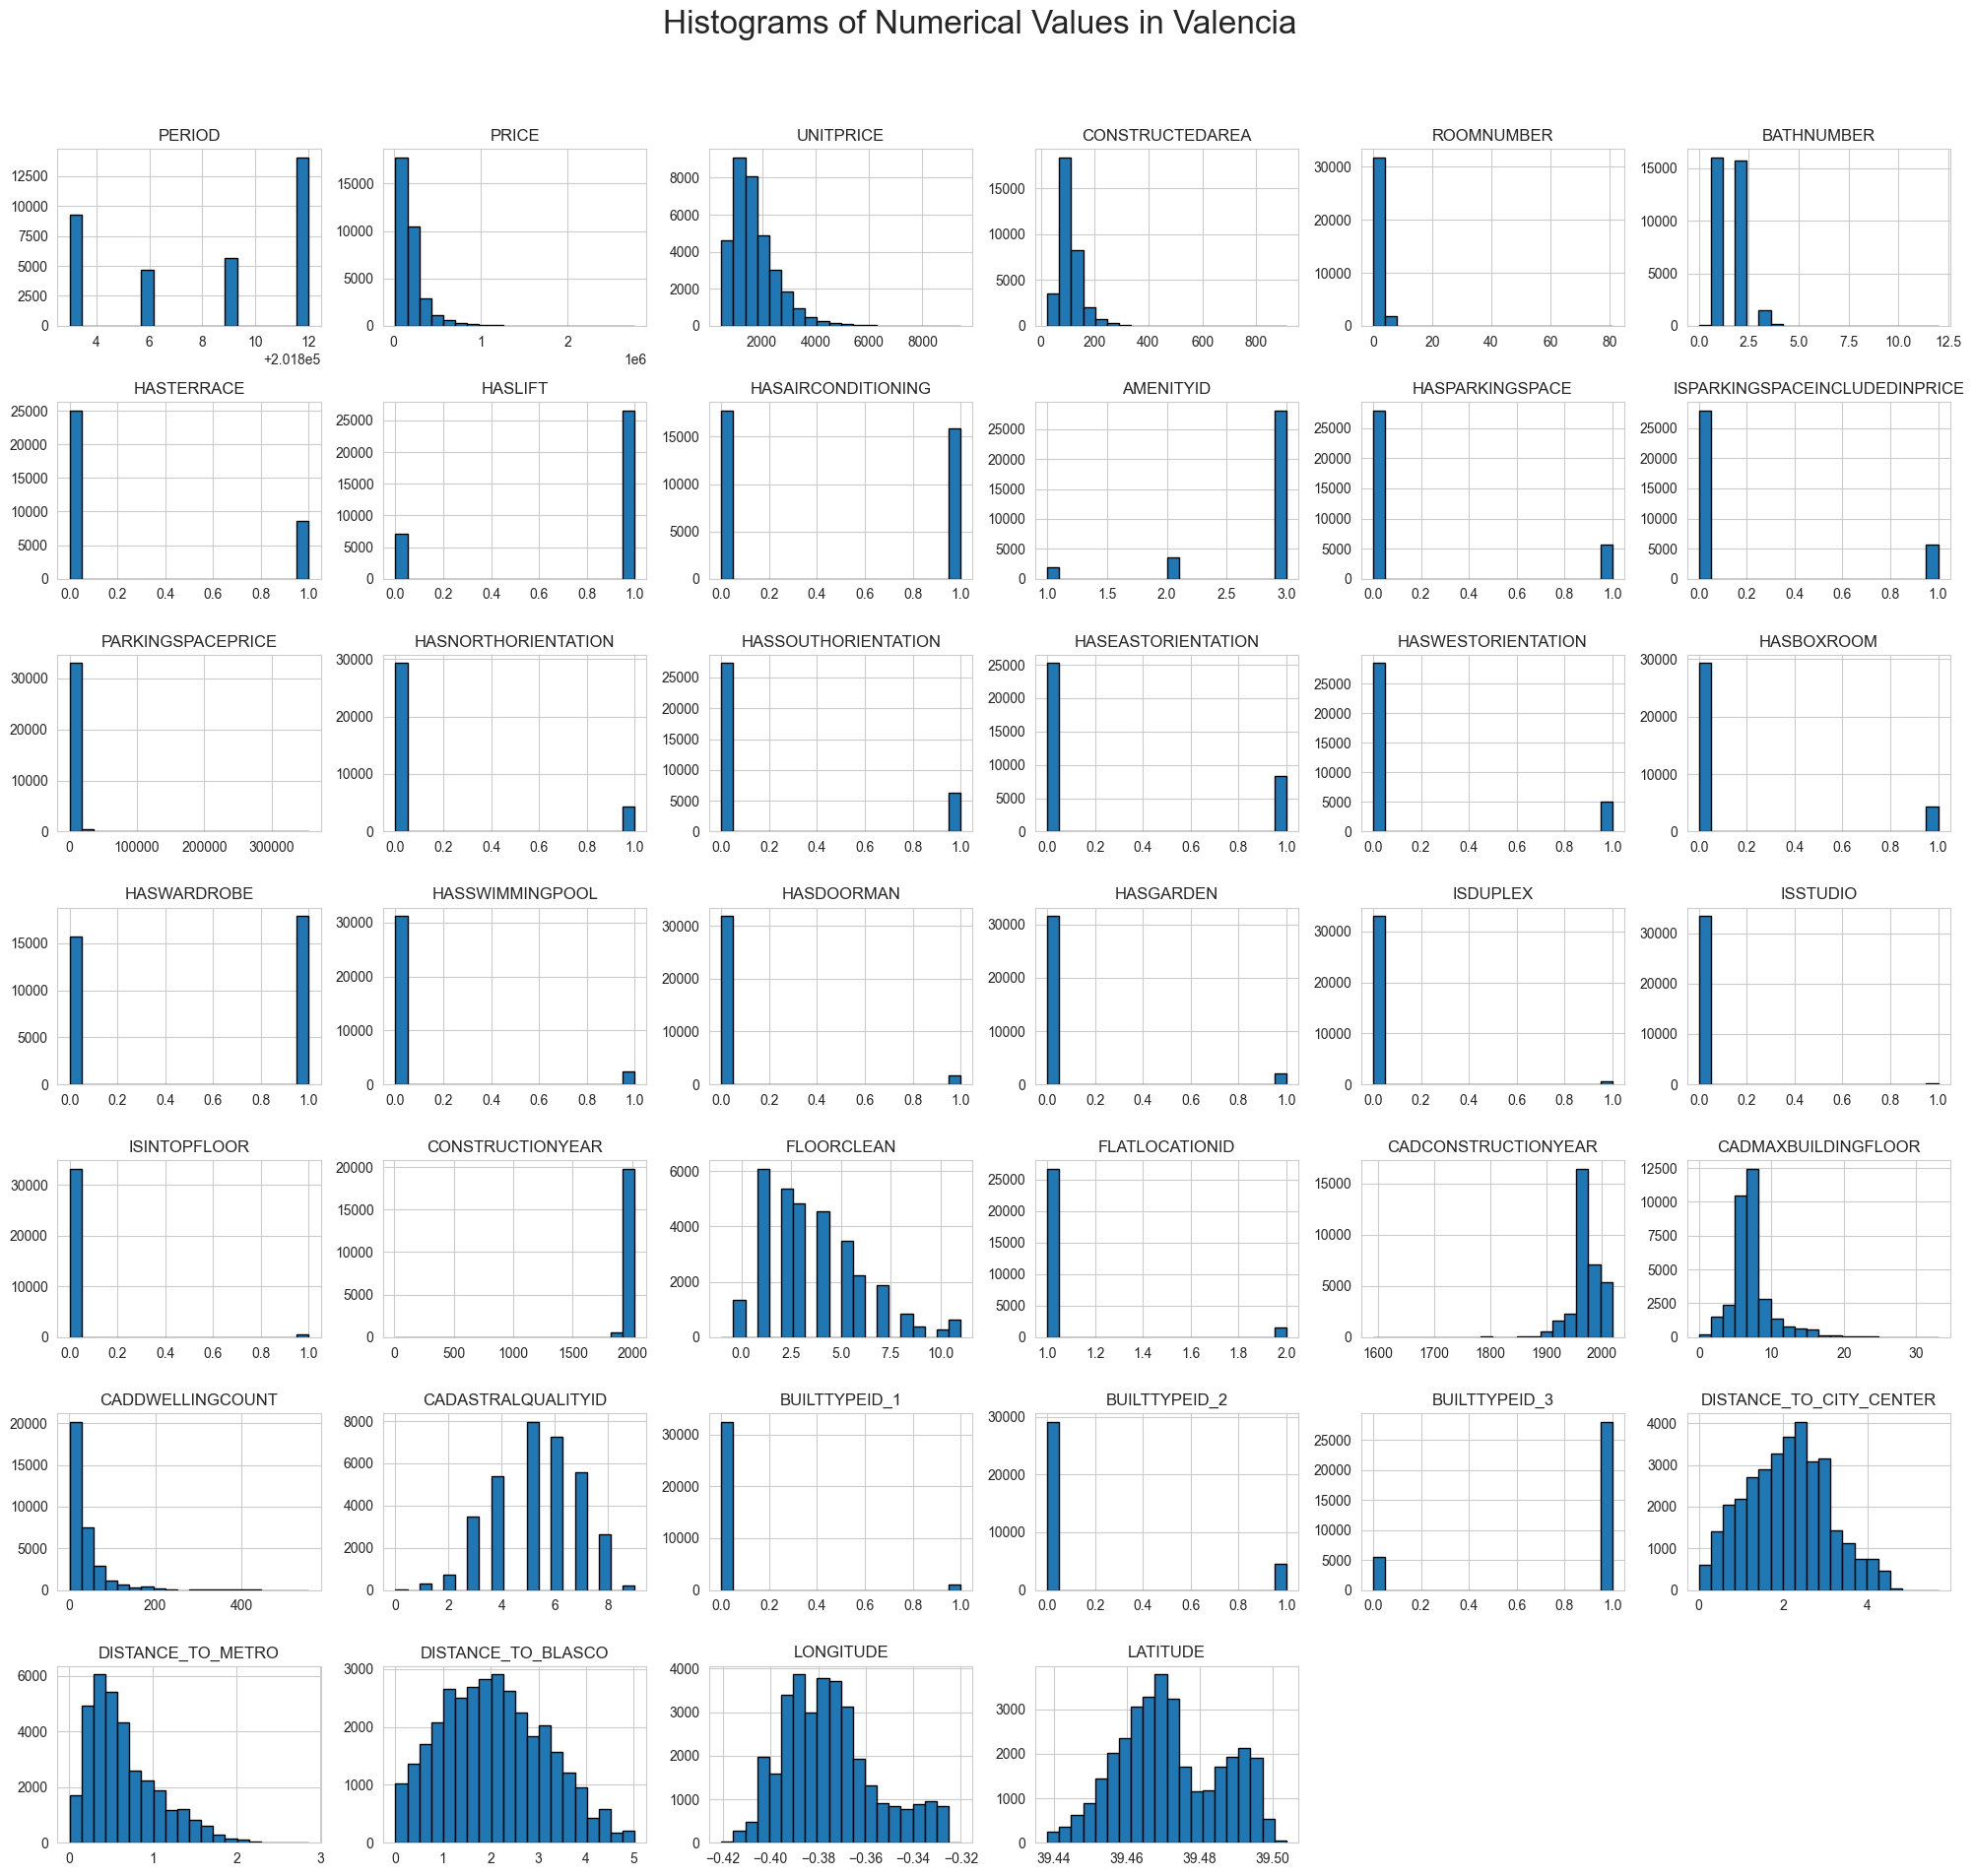

In [22]:
# Histograms of numerical values
print("\nHistograms for numerical values in Valencia dataset:")
valencia_numerical_columns = valencia_data.select_dtypes(include=['float64', 'int64']).columns

# Increase the figure size
valencia_data[valencia_numerical_columns].hist(figsize=(20, 20), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Values in Valencia", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

__Outlier identification__

In [23]:
# Count outliers in Valencia dataset
valencia_outlier_counts = count_outliers(valencia_data)

# Display the number of outliers and percentages for each column
print("\nNumber of outliers for each column in Valencia dataset:")
print(valencia_outlier_counts)


Number of outliers for each column in Valencia dataset:
                               Number of Outliers  Percentage
Total                                       91164  271.143894
HASEASTORIENTATION                           8384   24.936054
HASLIFT                                      7036   20.926774
HASSOUTHORIENTATION                          6300   18.737731
ISPARKINGSPACEINCLUDEDINPRICE                5668   16.858010
HASPARKINGSPACE                              5668   16.858010
BUILTTYPEID_3                                5576   16.584379
AMENITYID                                    5483   16.307775
HASWESTORIENTATION                           5116   15.216227
BUILTTYPEID_2                                4470   13.294866
HASNORTHORIENTATION                          4364   12.979597
HASBOXROOM                                   4356   12.955803
CADDWELLINGCOUNT                             2705    8.045327
HASSWIMMINGPOOL                              2407    7.159003
PRICE        

In [24]:
#Counts of highest and lowest values for numerical & categorical columns
value_counts_valencia = {column: valencia_data[column].value_counts().sort_index(ascending=False) for column in columns_to_count}

# Print the value counts for each column
for column, value_counts in value_counts_valencia.items():
    print(f"Value counts for {column}:\n")
    print(value_counts)
    print("\n" + "="*50 + "\n")

Value counts for CADDWELLINGCOUNT:

CADDWELLINGCOUNT
556      3
471      2
424     35
406      8
366      8
      ... 
5      646
4      367
3      452
2      518
1      277
Name: count, Length: 215, dtype: int64


Value counts for ROOMNUMBER:

ROOMNUMBER
81        1
15        2
11        6
10        8
9         8
8        15
7        89
6       321
5      1449
4      7645
3     15961
2      6508
1      1355
0       254
Name: count, dtype: int64


Value counts for CONSTRUCTEDAREA:

CONSTRUCTEDAREA
912    3
910    1
900    2
888    1
800    3
      ..
30     8
29     2
28     1
26     1
24     4
Name: count, Length: 358, dtype: int64


Value counts for DISTANCE_TO_METRO:

DISTANCE_TO_METRO
2.859185    1
2.407611    1
2.403609    1
2.399991    1
2.395533    1
           ..
0.005108    1
0.004905    1
0.004028    1
0.003926    1
0.003744    1
Name: count, Length: 33569, dtype: int64


Value counts for PRICE:

PRICE
2772000.0    1
2591000.0    1
2546000.0    1
2522000.0    1
2517000.0    1

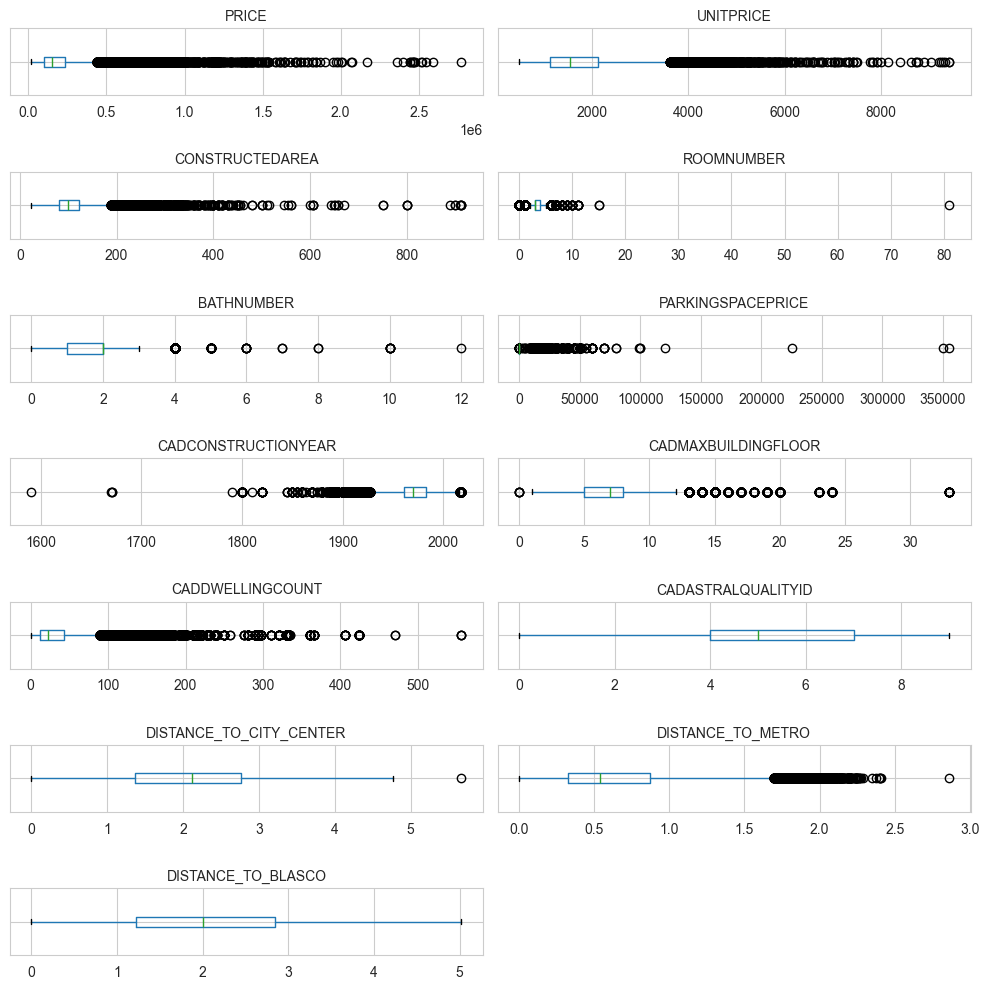

In [25]:
#Boxplots for all relevant variables

# Select relevant columns
boxplot_columns_valencia = [
    'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 
    'PARKINGSPACEPRICE', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 
    'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'DISTANCE_TO_CITY_CENTER', 
    'DISTANCE_TO_METRO', 'DISTANCE_TO_BLASCO'
]

# Filter the DataFrame to include only the selected columns
valencia_selected_data = valencia_data[boxplot_columns_valencia]

# Number of plots
num_plots = len(boxplot_columns_valencia)

# Plotting boxplots for each selected column
plt.figure(figsize=(10, 10))

# Create subplots with 2 columns
for i, column in enumerate(boxplot_columns_valencia, 1):
    ax = plt.subplot((num_plots + 1) // 2, 2, i)
    valencia_selected_data.boxplot(column=column, vert=False, ax=ax)
    ax.set_title(column, fontsize=10)
    ax.set_yticklabels([])  # Remove the y-axis labels
    plt.grid(True)

plt.tight_layout()
plt.show()

__Missing values__

In [26]:
# Check for missing values
valencia_missing_values = valencia_data.isnull().sum()
valencia_missing_percent = (valencia_missing_values / len(valencia_data)) * 100

# Create a DataFrame to display the count and percentage of missing values
valencia_missing_data = pd.DataFrame({
    'Missing Values': valencia_missing_values,
    'Percentage': valencia_missing_percent
})

# Filter to show only rows with missing values
valencia_missing_data = valencia_missing_data[valencia_missing_data['Missing Values'] > 0]

print("\nMissing values in Valencia dataset:")
print(valencia_missing_data)


Missing values in Valencia dataset:
                  Missing Values  Percentage
CONSTRUCTIONYEAR           13201   39.262983
FLOORCLEAN                  1730    5.145440
FLATLOCATIONID              5404   16.072809
neighborhood                  44    0.130867


__Correlation between variables__


Correlation matrix for Valencia dataset:


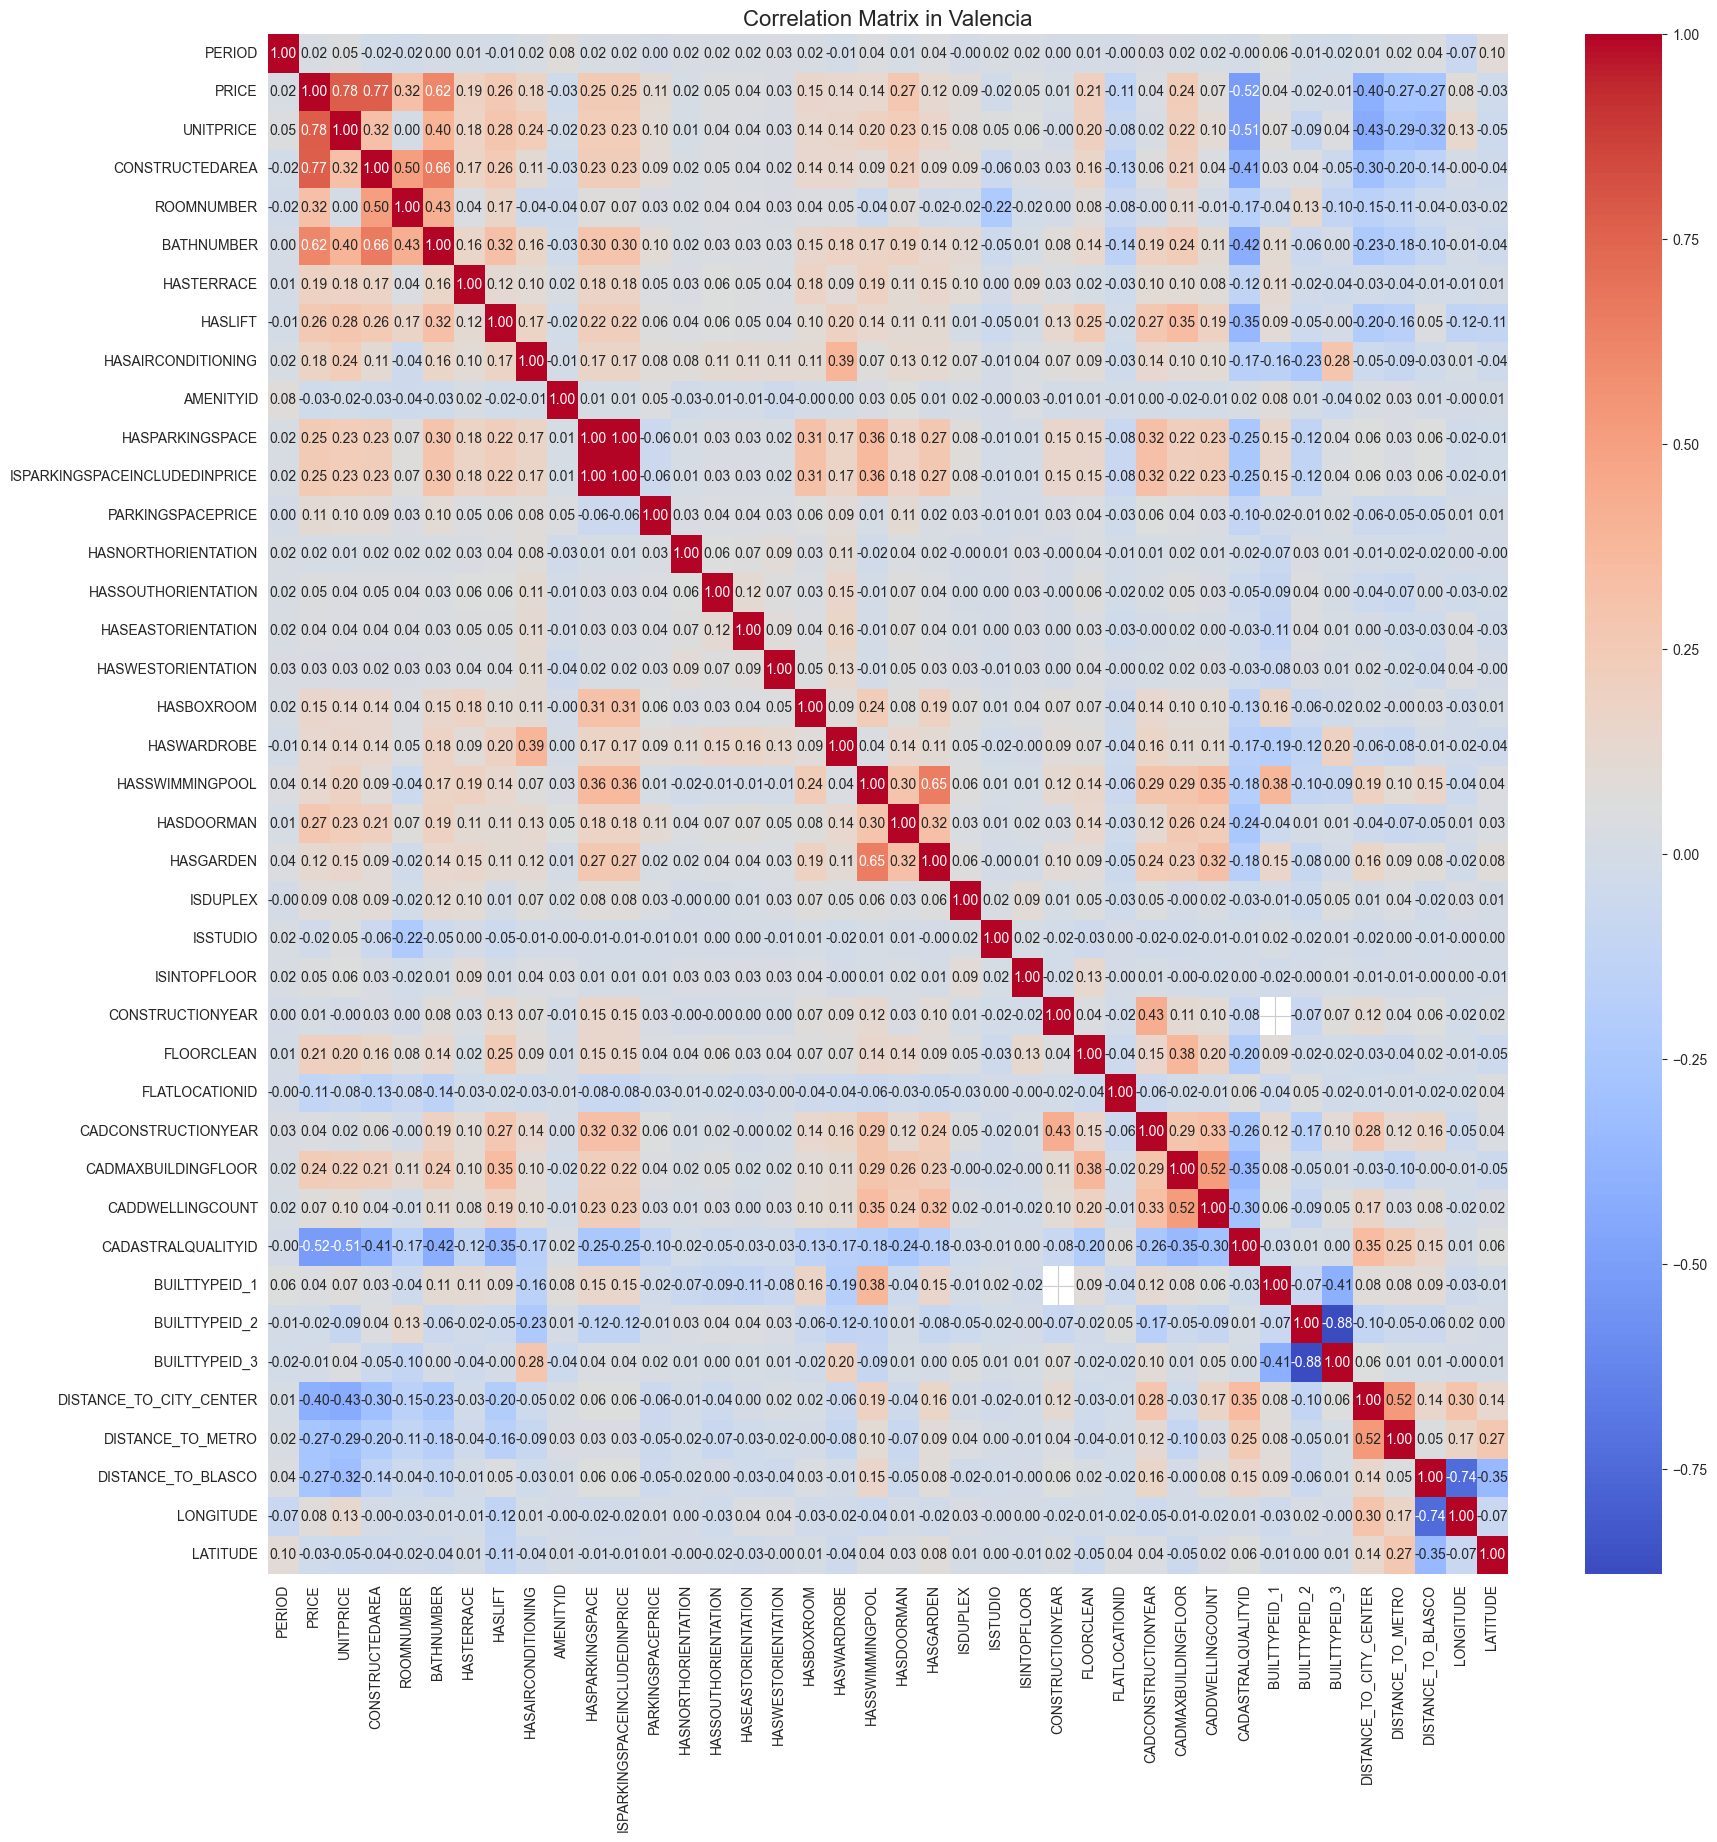

In [27]:
# Correlation matrix
print("\nCorrelation matrix for Valencia dataset:")
valencia_correlation_matrix = valencia_data[valencia_numerical_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(valencia_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Valencia", fontsize=16)
plt.show()

__Check whether boolean columns on parking are equal to each other (given correlation of 1.0)__

In [28]:
#Count number of times the column HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same
madrid_data['IsSame'] = madrid_data['HASPARKINGSPACE'] == madrid_data['ISPARKINGSPACEINCLUDEDINPRICE']
not_same_count = (~madrid_data['IsSame']).sum()

print(f'Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: {not_same_count}')

# Drop auxiliary column
madrid_data = madrid_data.drop(columns=['IsSame'])

Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: 0


__Analyze distribution of price for different clusters__

Average price per cluster:
Cluster
2    451734.148363
0    240983.466667
4    172066.585067
3    128352.510337
1    104910.495716
Name: PRICE, dtype: float64


<Figure size 1500x1000 with 0 Axes>

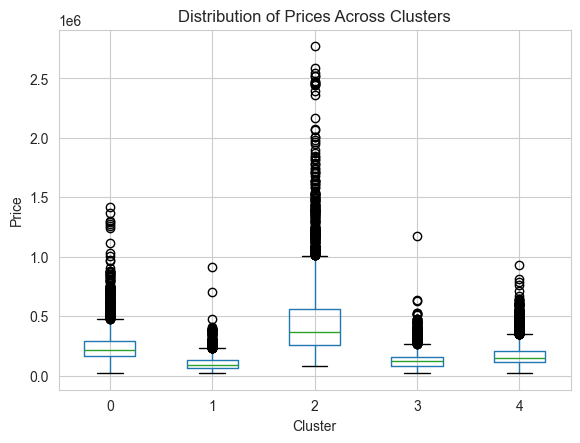


Cluster characteristics:
         CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  DISTANCE_TO_METRO  \
Cluster                                                               
0             117.864711    3.099911    1.931200           0.672381   
1              84.953182    2.783660    1.214963           1.183868   
2             183.405305    4.336303    2.371529           0.373505   
3              98.915889    3.028352    1.509155           0.583634   
4              88.408201    2.556181    1.259486           0.418076   

         CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  DISTANCE_TO_CITY_CENTER  \
Cluster                                                                      
0                1990.439467            10.459733                 2.442804   
1                1968.120869             5.544676                 3.034157   
2                1963.945504             7.626813                 1.031419   
3                1977.540579             6.477259                 2.419026   
4       

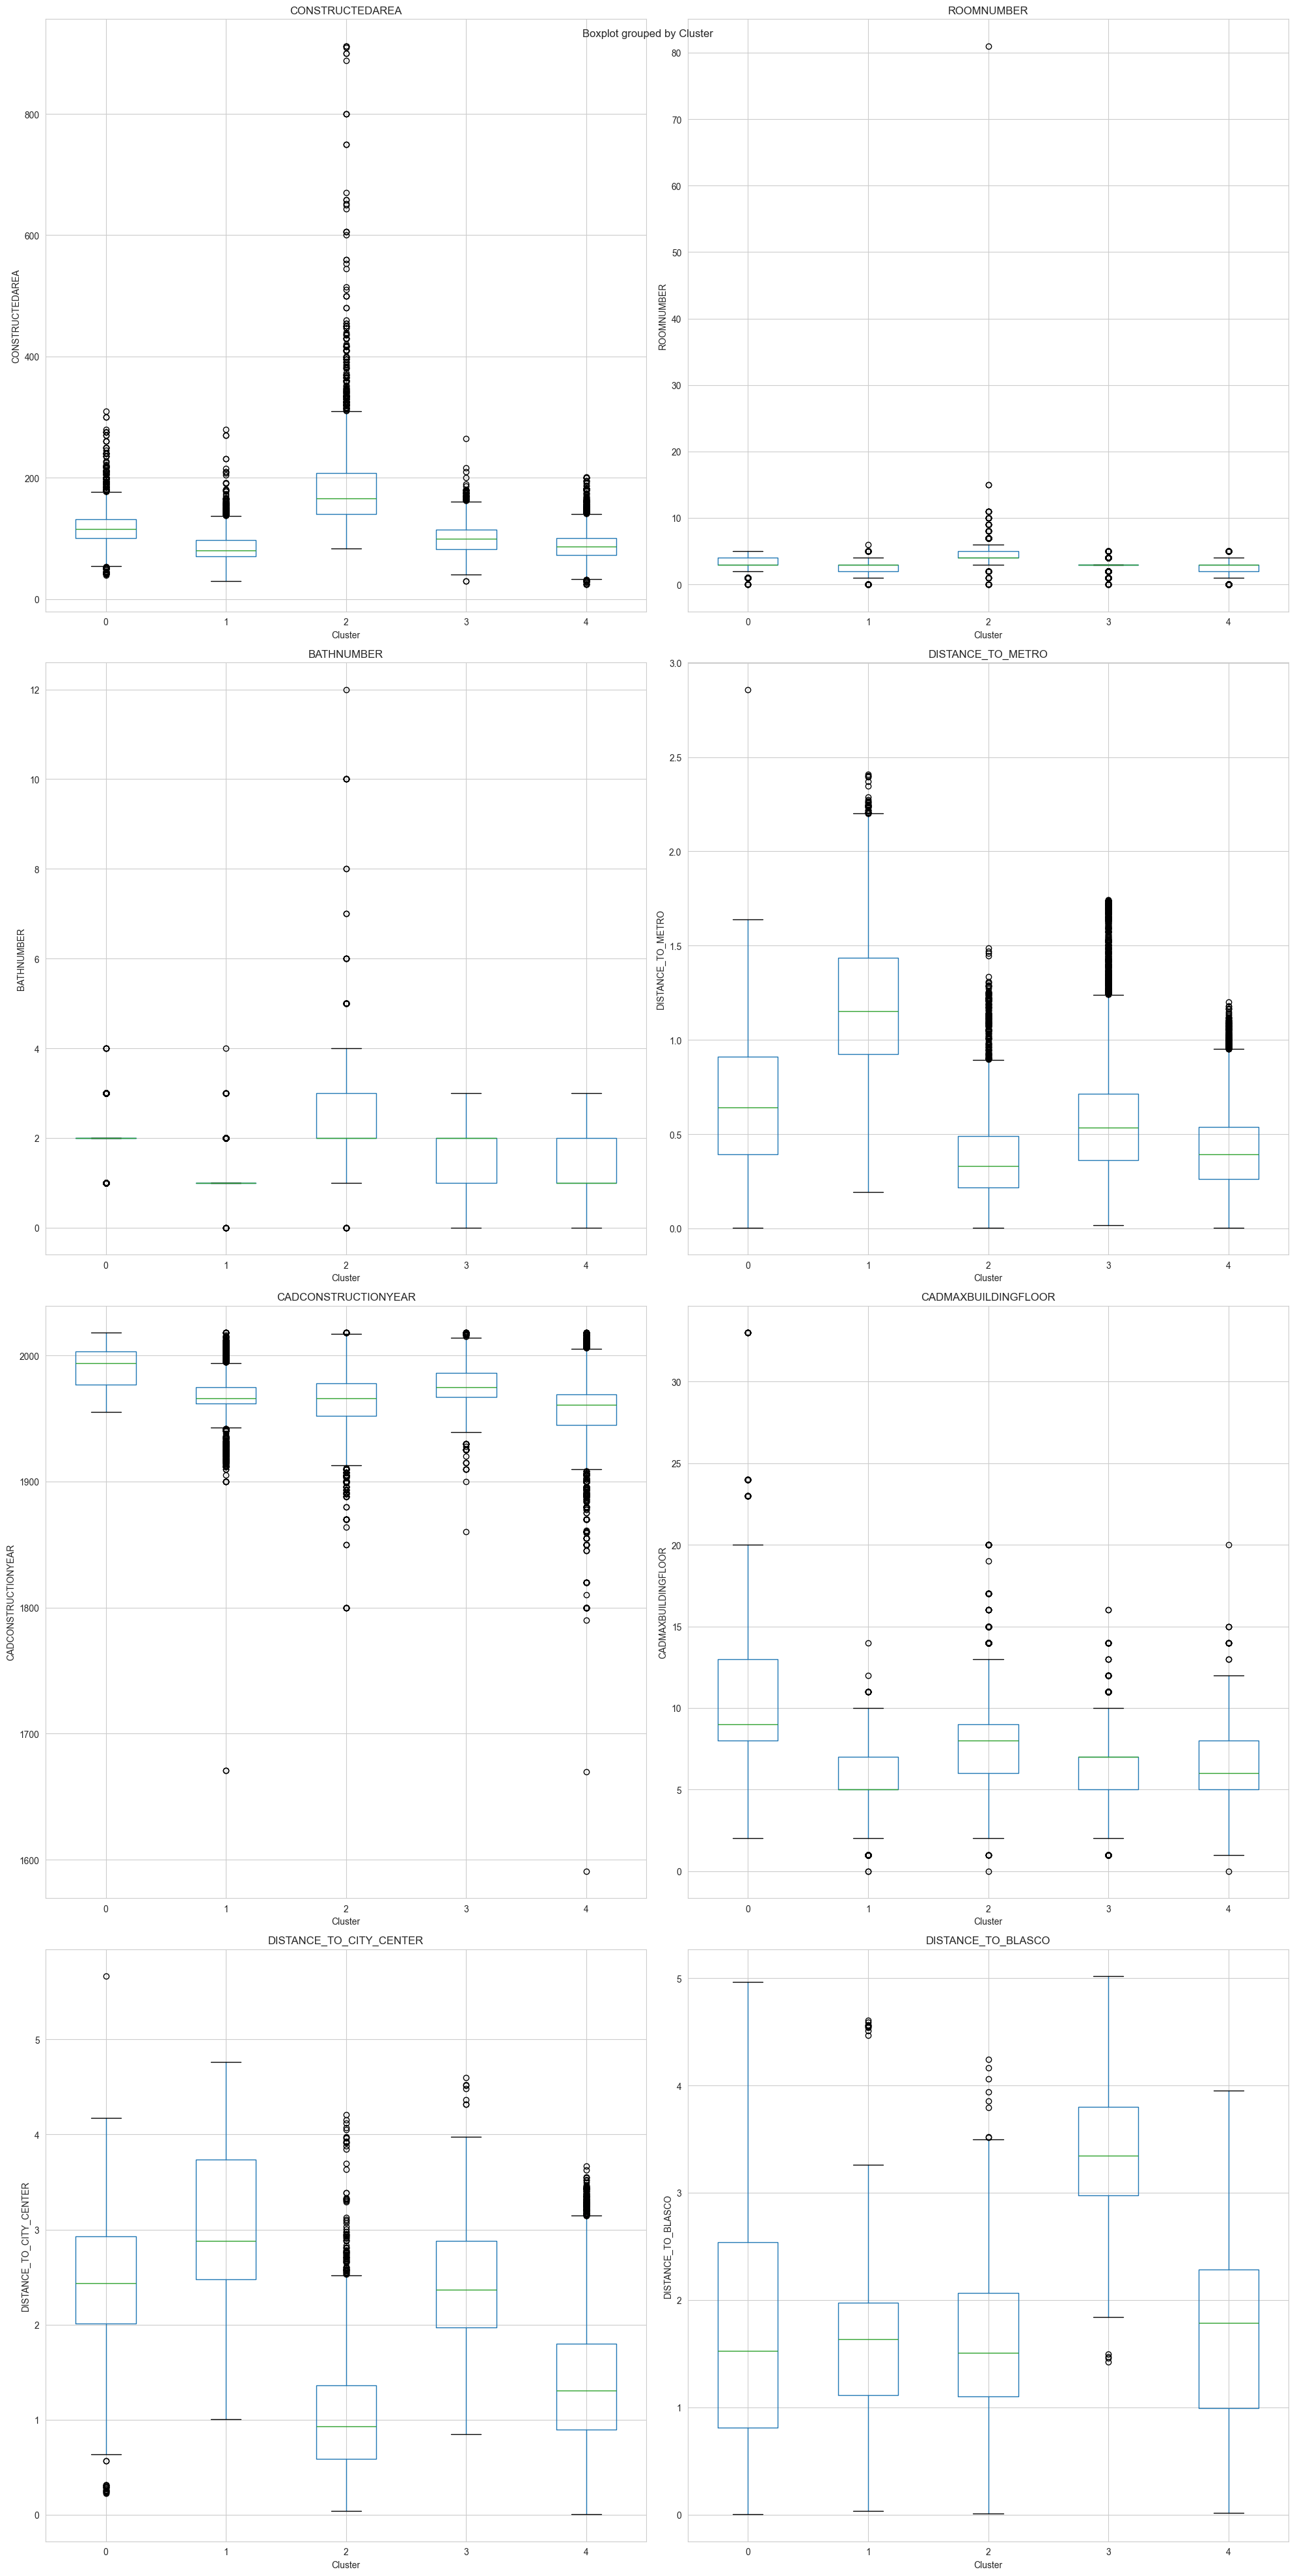

In [29]:
# Select relevant features for clustering
relevant_features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'DISTANCE_TO_METRO',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'DISTANCE_TO_CITY_CENTER',
    'DISTANCE_TO_BLASCO'
]

# Create a copy of the dataset with only the selected features
cluster_data = valencia_data[relevant_features].copy()

# Handle missing values (if any)
cluster_data = cluster_data.fillna(cluster_data.mean())

# Standardize the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the original dataset
valencia_data['Cluster'] = cluster_labels

# Calculate average price for each cluster
cluster_prices = valencia_data.groupby('Cluster')['PRICE'].mean().sort_values(ascending=False)

print("Average price per cluster:")
print(cluster_prices)

# Visualize clusters using boxplots
plt.figure(figsize=(15, 10))
valencia_data.boxplot(column='PRICE', by='Cluster')
plt.title('Distribution of Prices Across Clusters')
plt.suptitle('')  # This removes the automatic suptitle added by pandas
plt.ylabel('Price')
plt.show()

# Analyze cluster characteristics
cluster_summary = valencia_data.groupby('Cluster')[relevant_features + ['PRICE']].mean()
print("\nCluster characteristics:")
print(cluster_summary)

# Feature importance in clustering
feature_importance = pd.DataFrame({
    'Feature': relevant_features,
    'Importance': np.sum(np.abs(kmeans.cluster_centers_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature importance in clustering:")
print(feature_importance)

# Visualize all important features across clusters
fig, axes = plt.subplots(4, 2, figsize=(20, 40))
fig.suptitle('Distribution of Features Across Clusters', fontsize=16)

for i, feature in enumerate(relevant_features):
    row = i // 2
    col = i % 2
    valencia_data.boxplot(column=feature, by='Cluster', ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Barcelona Dataset

In [30]:
# Load the Barcelona dataset
barcelona_data = pd.read_csv('../../data/2_raw_idealista_data_incl_polygon/barcelona_sale_with_polygon.csv')

__Structure of the dataset__

In [31]:
# Total number of rows
barcelona_total_rows = barcelona_data.shape[0]
print(f"\nTotal number of rows in Barcelona dataset: {barcelona_total_rows}")

# Check data types
print("\nData types for Barcelona dataset:")
print(barcelona_data.dtypes)


Total number of rows in Barcelona dataset: 61486

Data types for Barcelona dataset:
ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                float64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN    

In [32]:
# Check for duplicates in rows
barcelona_duplicate_rows = barcelona_data.duplicated().sum()
print(f"\nNumber of duplicate rows in Barcelona dataset: {barcelona_duplicate_rows}")

# Check for duplicates in assets
barcelona_duplicate_assets = barcelona_data['ASSETID'].duplicated().sum()
barcelona_duplicate_assets_percent = (barcelona_duplicate_assets / len(barcelona_data)) * 100
print(f"\nNumber of assets that appear more than once in Barcelona dataset: {barcelona_duplicate_assets}, making up {barcelona_duplicate_assets_percent:.2f}% of the data")

assetid_counts_barcelona = barcelona_data['ASSETID'].value_counts()
max_assetid_occurrences_barcelona = assetid_counts_barcelona.max()
max_assetid_barcelona = assetid_counts_barcelona.idxmax()
print(f"\nMaximum number of times an ASSETID appears in the Barcelona dataset: {max_assetid_occurrences_barcelona}")
print(f"ASSETID with the maximum occurrences in Barcelona dataset: {max_assetid_barcelona}")


Number of duplicate rows in Barcelona dataset: 0

Number of assets that appear more than once in Barcelona dataset: 14757, making up 24.00% of the data

Maximum number of times an ASSETID appears in the Barcelona dataset: 10
ASSETID with the maximum occurrences in Barcelona dataset: A13926807464691075726


__Summary statistics and distributions__

In [33]:
# Generate summary statistics for numerical features
numerical_summary = barcelona_data.describe()
print("\nSummary statistics for numerical features in Barcelona dataset:")
print(numerical_summary)

# Generate summary statistics for categorical features
categorical_features = barcelona_data.select_dtypes(include=['object']).columns

categorical_summary = {}
for column in categorical_features:
    categorical_summary[column] = barcelona_data[column].value_counts()

print("\nSummary statistics for categorical features in Barcelona dataset:")
for column, summary in categorical_summary.items():
    print(f"\nColumn: {column}")
    print(summary)


Summary statistics for numerical features in Barcelona dataset:
              PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   61486.000000  6.148600e+04  61486.000000     61486.000000   
mean   201808.011043  3.957706e+05   4044.864609        95.460284   
std         3.746817  2.815548e+05   1190.890791        52.577355   
min    201803.000000  3.700000e+04   1203.703704        21.000000   
25%    201803.000000  2.300000e+05   3202.574410        66.000000   
50%    201809.000000  3.250000e+05   3991.341829        82.000000   
75%    201812.000000  4.620000e+05   4841.463415       108.000000   
max    201812.000000  4.866000e+06   6996.688742       959.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  61486.000000  61486.000000  61486.000000  61486.000000   
mean       2.864229      1.518736      0.329913      0.742559   
std        1.132634      0.711525      0.470185      0.437228   
min        0.000000      0.000000      0.000000      


Histograms for numerical values in Barcelona dataset:


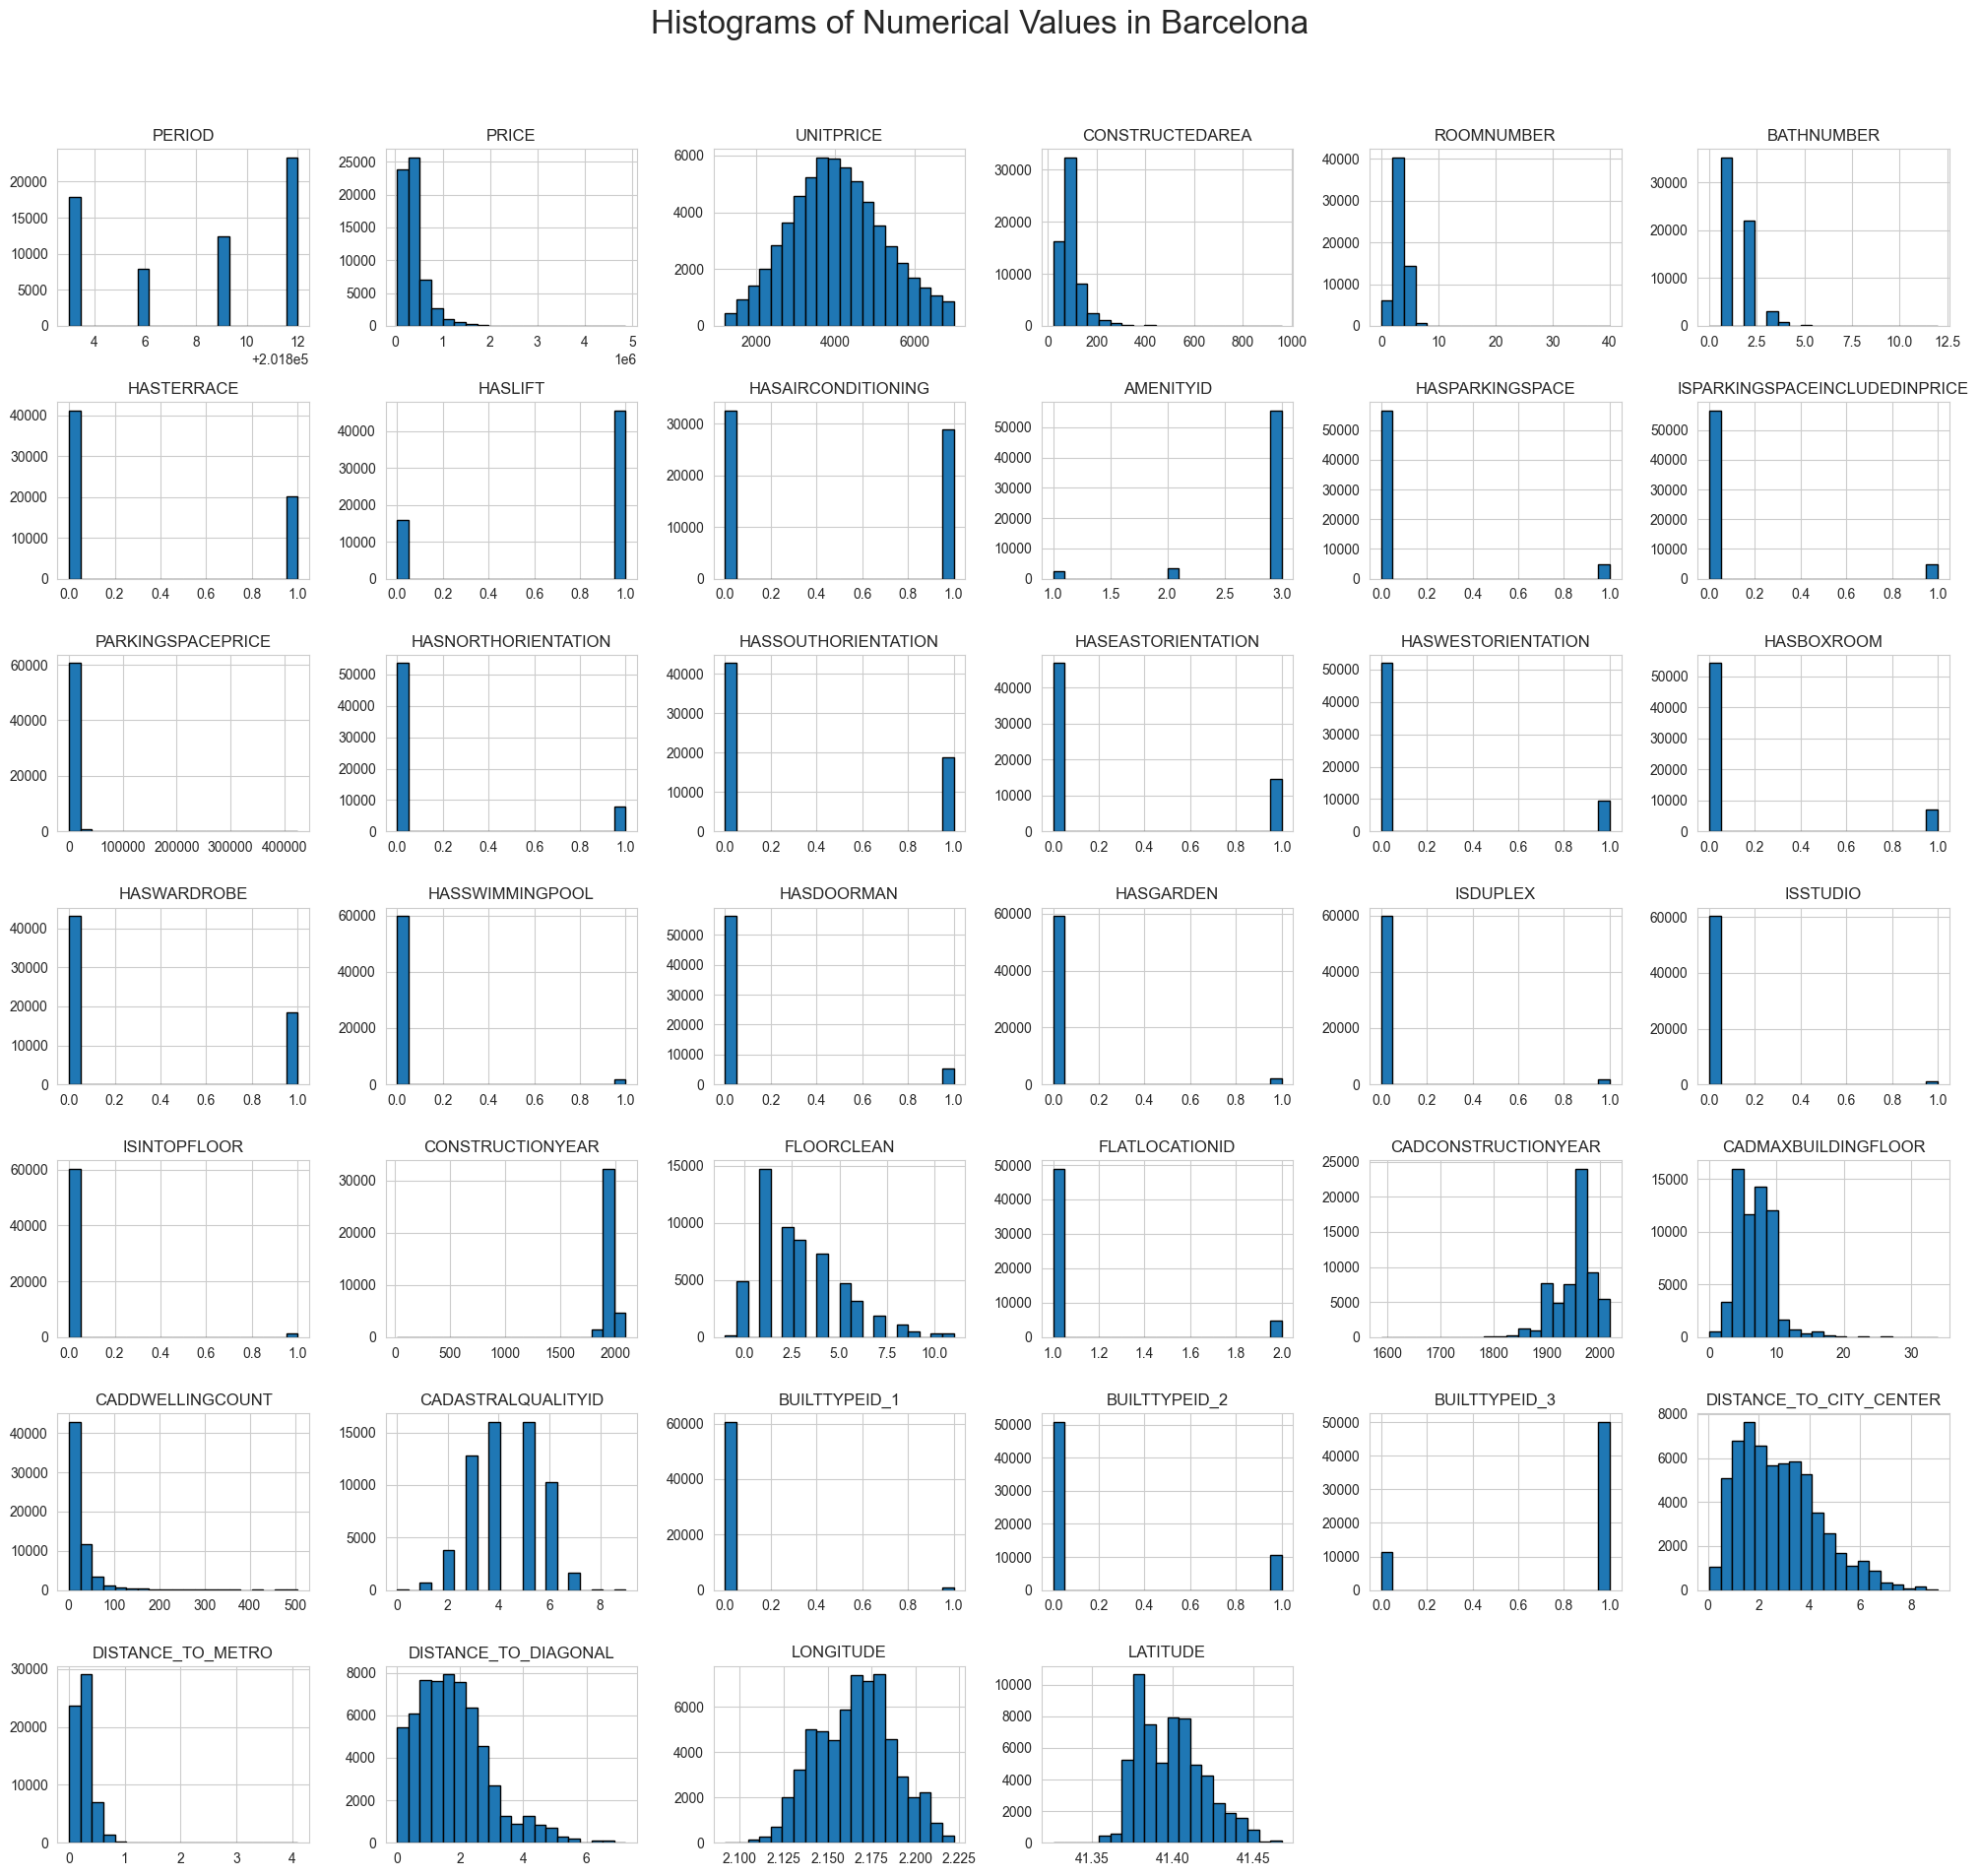

In [34]:
# Histograms of numerical values
print("\nHistograms for numerical values in Barcelona dataset:")
barcelona_numerical_columns = barcelona_data.select_dtypes(include=['float64', 'int64']).columns

# Increase the figure size
barcelona_data[barcelona_numerical_columns].hist(figsize=(20, 20), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Values in Barcelona", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

__Outlier identification__

In [35]:
# Count outliers in Barcelona dataset
barcelona_outlier_counts = count_outliers(barcelona_data)

# Display the number of outliers and percentages for each column
print("\nNumber of outliers for each column in Barcelona dataset:")
print(barcelona_outlier_counts)



Number of outliers for each column in Barcelona dataset:
                               Number of Outliers  Percentage
Total                                      125371  203.901701
HASEASTORIENTATION                          14682   23.878607
BUILTTYPEID_3                               11270   18.329376
BUILTTYPEID_2                               10517   17.104707
HASWESTORIENTATION                           9584   15.587288
HASNORTHORIENTATION                          7949   12.928146
HASBOXROOM                                   7199   11.708356
AMENITYID                                    5974    9.716033
CADDWELLINGCOUNT                             5367    8.728816
HASDOORMAN                                   5180    8.424682
HASPARKINGSPACE                              4898    7.966041
ISPARKINGSPACEINCLUDEDINPRICE                4898    7.966041
FLATLOCATIONID                               4824    7.845688
ROOMNUMBER                                   4634    7.536675
PRICE       

In [36]:
#Counts of highest and lowest values for numerical & categorical columns
value_counts_barcelona = {column: madrid_data[column].value_counts().sort_index(ascending=False) for column in columns_to_count}

# Print the value counts for each column
for column, value_counts in value_counts_barcelona.items():
    print(f"Value counts for {column}:\n")
    print(value_counts)
    print("\n" + "="*50 + "\n")

Value counts for CADDWELLINGCOUNT:

CADDWELLINGCOUNT
1499       2
724       23
701        1
638        4
574       55
        ... 
5       1477
4       1402
3       1126
2       1087
1        691
Name: count, Length: 329, dtype: int64


Value counts for ROOMNUMBER:

ROOMNUMBER
93        1
33        1
20        2
18        2
16        2
15        3
14        5
13        6
12       18
11       16
10       24
9        35
8       142
7       279
6       789
5      3350
4     11674
3     33961
2     28422
1     13338
0      2745
Name: count, dtype: int64


Value counts for CONSTRUCTEDAREA:

CONSTRUCTEDAREA
985      1
982      1
951      1
950      1
941      2
      ... 
25     235
24      74
23      54
22      61
21      58
Name: count, Length: 558, dtype: int64


Value counts for DISTANCE_TO_METRO:

DISTANCE_TO_METRO
399.477366    1
9.425214      1
9.374054      1
9.355168      1
9.344541      1
             ..
0.004133      1
0.004018      1
0.003159      1
0.002589      1
0.001416      

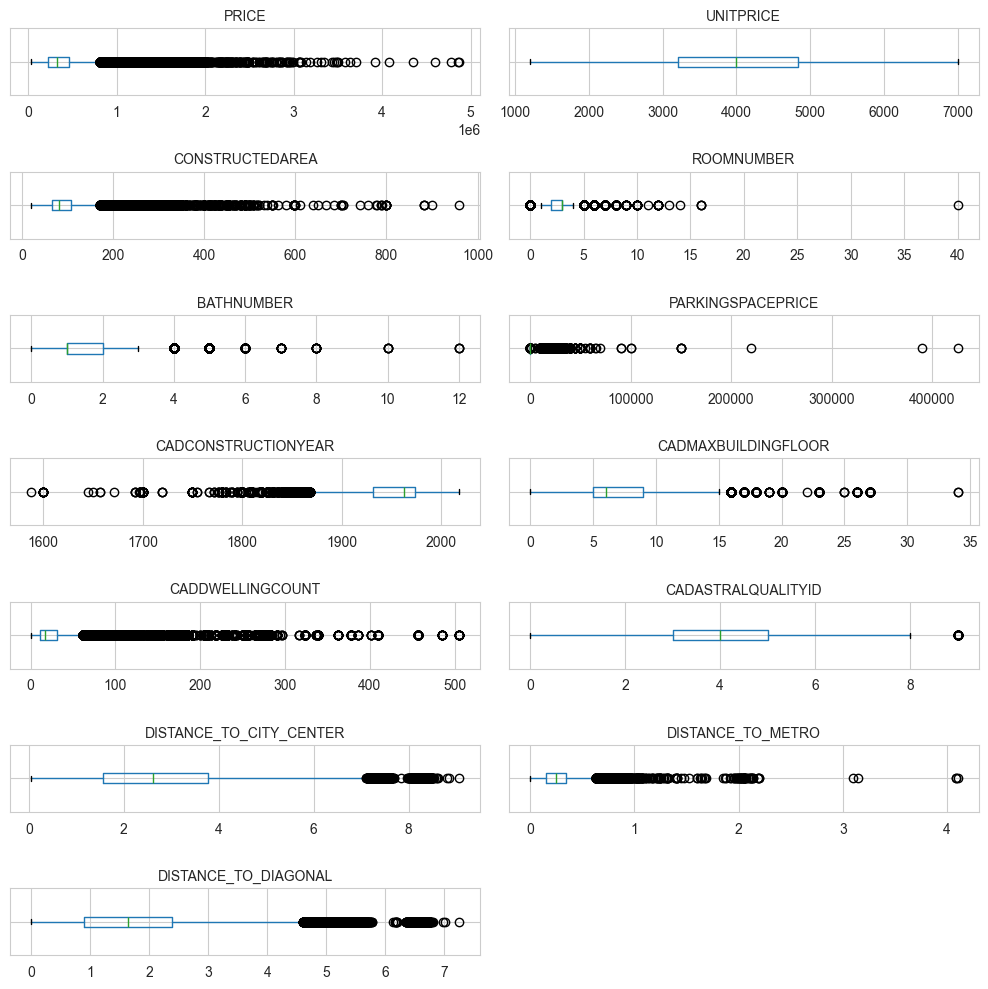

In [37]:
#Boxplots for all relevant variables

# Select relevant columns
boxplot_columns_barcelona = [
    'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 
    'PARKINGSPACEPRICE', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 
    'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'DISTANCE_TO_CITY_CENTER', 
    'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL'
]

# Filter the DataFrame to include only the selected columns
barcelona_selected_data = barcelona_data[boxplot_columns_barcelona]

# Number of plots
num_plots = len(boxplot_columns_barcelona)

# Plotting boxplots for each selected column
plt.figure(figsize=(10, 10))

# Create subplots with 2 columns
for i, column in enumerate(boxplot_columns_barcelona, 1):
    ax = plt.subplot((num_plots + 1) // 2, 2, i)
    barcelona_selected_data.boxplot(column=column, vert=False, ax=ax)
    ax.set_title(column, fontsize=10)
    ax.set_yticklabels([])  # Remove the y-axis labels
    plt.grid(True)

plt.tight_layout()
plt.show()

__Missing values__

In [38]:
# Check for missing values
barcelona_missing_values = barcelona_data.isnull().sum()
barcelona_missing_percent = (barcelona_missing_values / len(barcelona_data)) * 100

# Create a DataFrame to display the count and percentage of missing values
missing_data = pd.DataFrame({
    'Missing Values': barcelona_missing_values,
    'Percentage': barcelona_missing_percent
})

# Filter to show only rows with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

print("\nMissing values in Barcelona dataset:")
print(missing_data)



Missing values in Barcelona dataset:
                  Missing Values  Percentage
CONSTRUCTIONYEAR           22974   37.364603
FLOORCLEAN                  4253    6.917022
FLATLOCATIONID              7772   12.640276
neighborhood                 147    0.239079


__Correlation between variables__


Correlation matrix for Barcelona dataset:


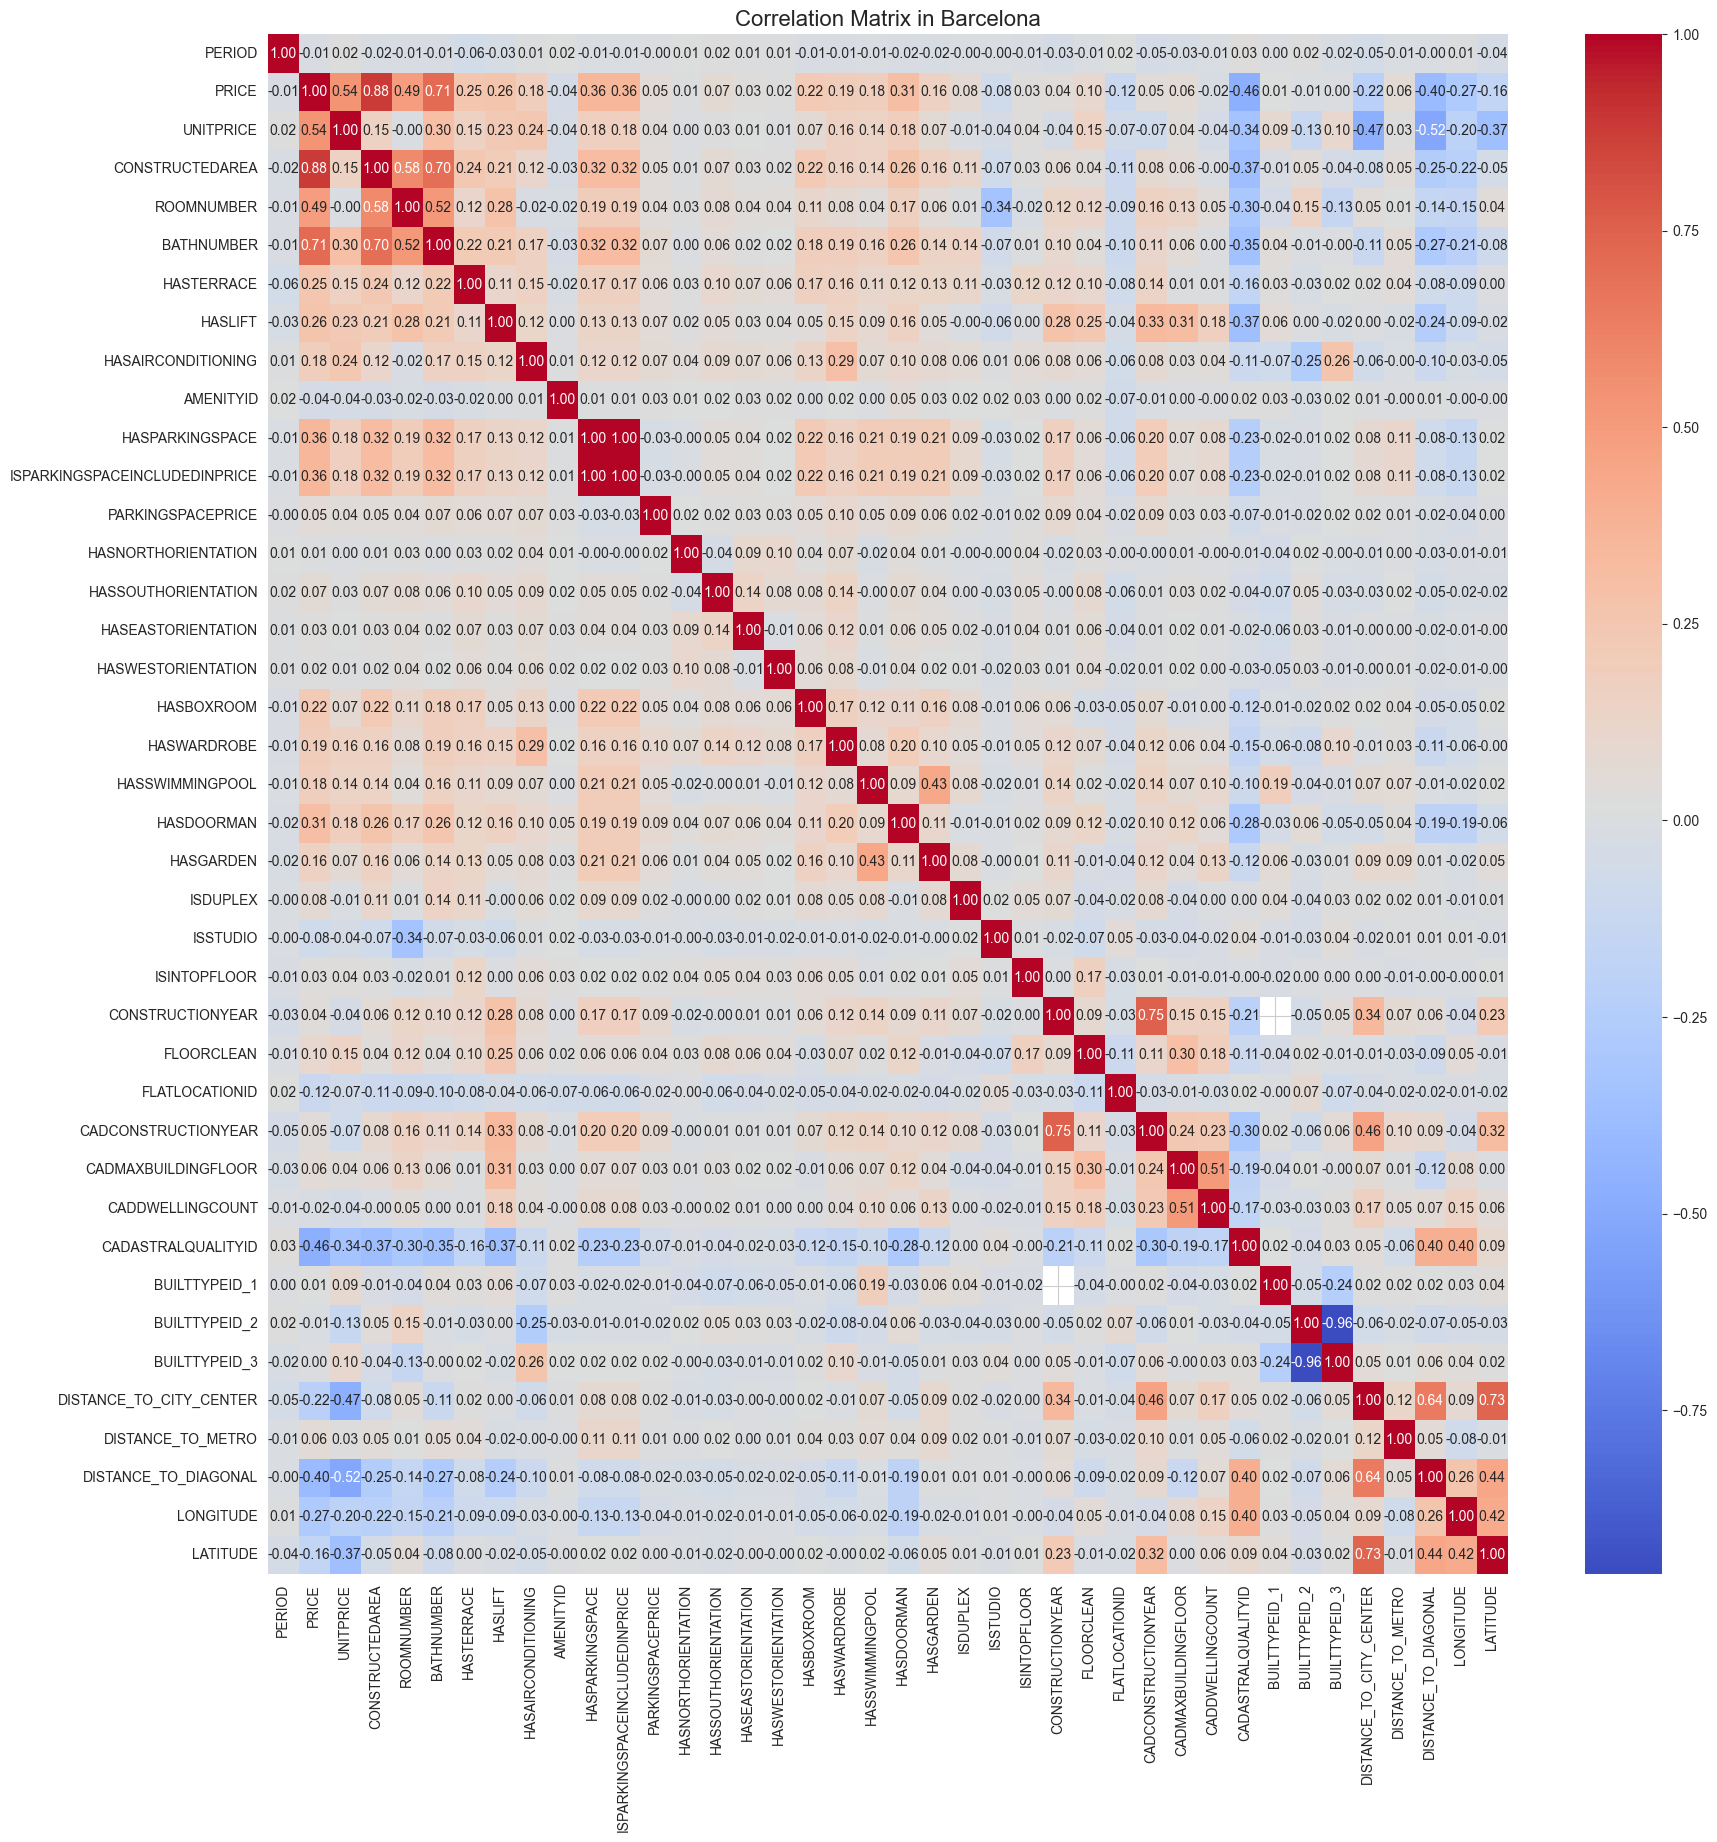

In [39]:
# Correlation matrix
print("\nCorrelation matrix for Barcelona dataset:")
barcelona_correlation_matrix = barcelona_data[barcelona_numerical_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(barcelona_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Barcelona", fontsize=16)
plt.show()

__Check whether boolean columns on parking are equal to each other (given correlation of 1.0)__

In [40]:
#Count number of times the column HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same
barcelona_data['IsSame'] = barcelona_data['HASPARKINGSPACE'] == barcelona_data['ISPARKINGSPACEINCLUDEDINPRICE']
not_same_count = (~barcelona_data['IsSame']).sum()

print(f'Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: {not_same_count}')

# Drop auxiliary column
barcelona_data = barcelona_data.drop(columns=['IsSame'])

Number of times HASPARKINGSPACE and ISPARKINGSPACEINCLUDEDINPRICE are not the same: 0


__Analyze distribution of price for different clusters__

Average price per cluster:
Cluster
2    1.163038e+06
0    5.082789e+05
3    3.261866e+05
4    2.924675e+05
1    2.111998e+05
Name: PRICE, dtype: float64


<Figure size 1500x1000 with 0 Axes>

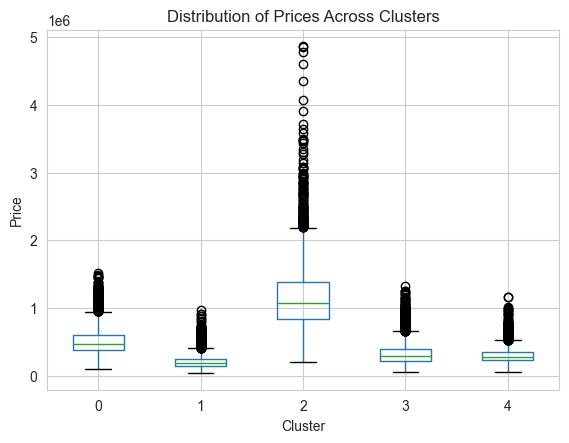


Cluster characteristics:
         CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  DISTANCE_TO_METRO  \
Cluster                                                               
0             114.040919    3.486469    2.031563           0.267822   
1              75.783166    2.783069    1.191855           0.289609   
2             246.556445    4.833095    3.226065           0.305834   
3              76.151943    2.193776    1.266323           0.239082   
4              73.344727    2.448761    1.048811           0.263555   

         CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  DISTANCE_TO_CITY_CENTER  \
Cluster                                                                      
0                1967.912714             7.629952                 2.450089   
1                1970.387890             6.148897                 5.302281   
2                1954.643327             6.843098                 2.577318   
3                1902.881212             5.316903                 1.504728   
4       

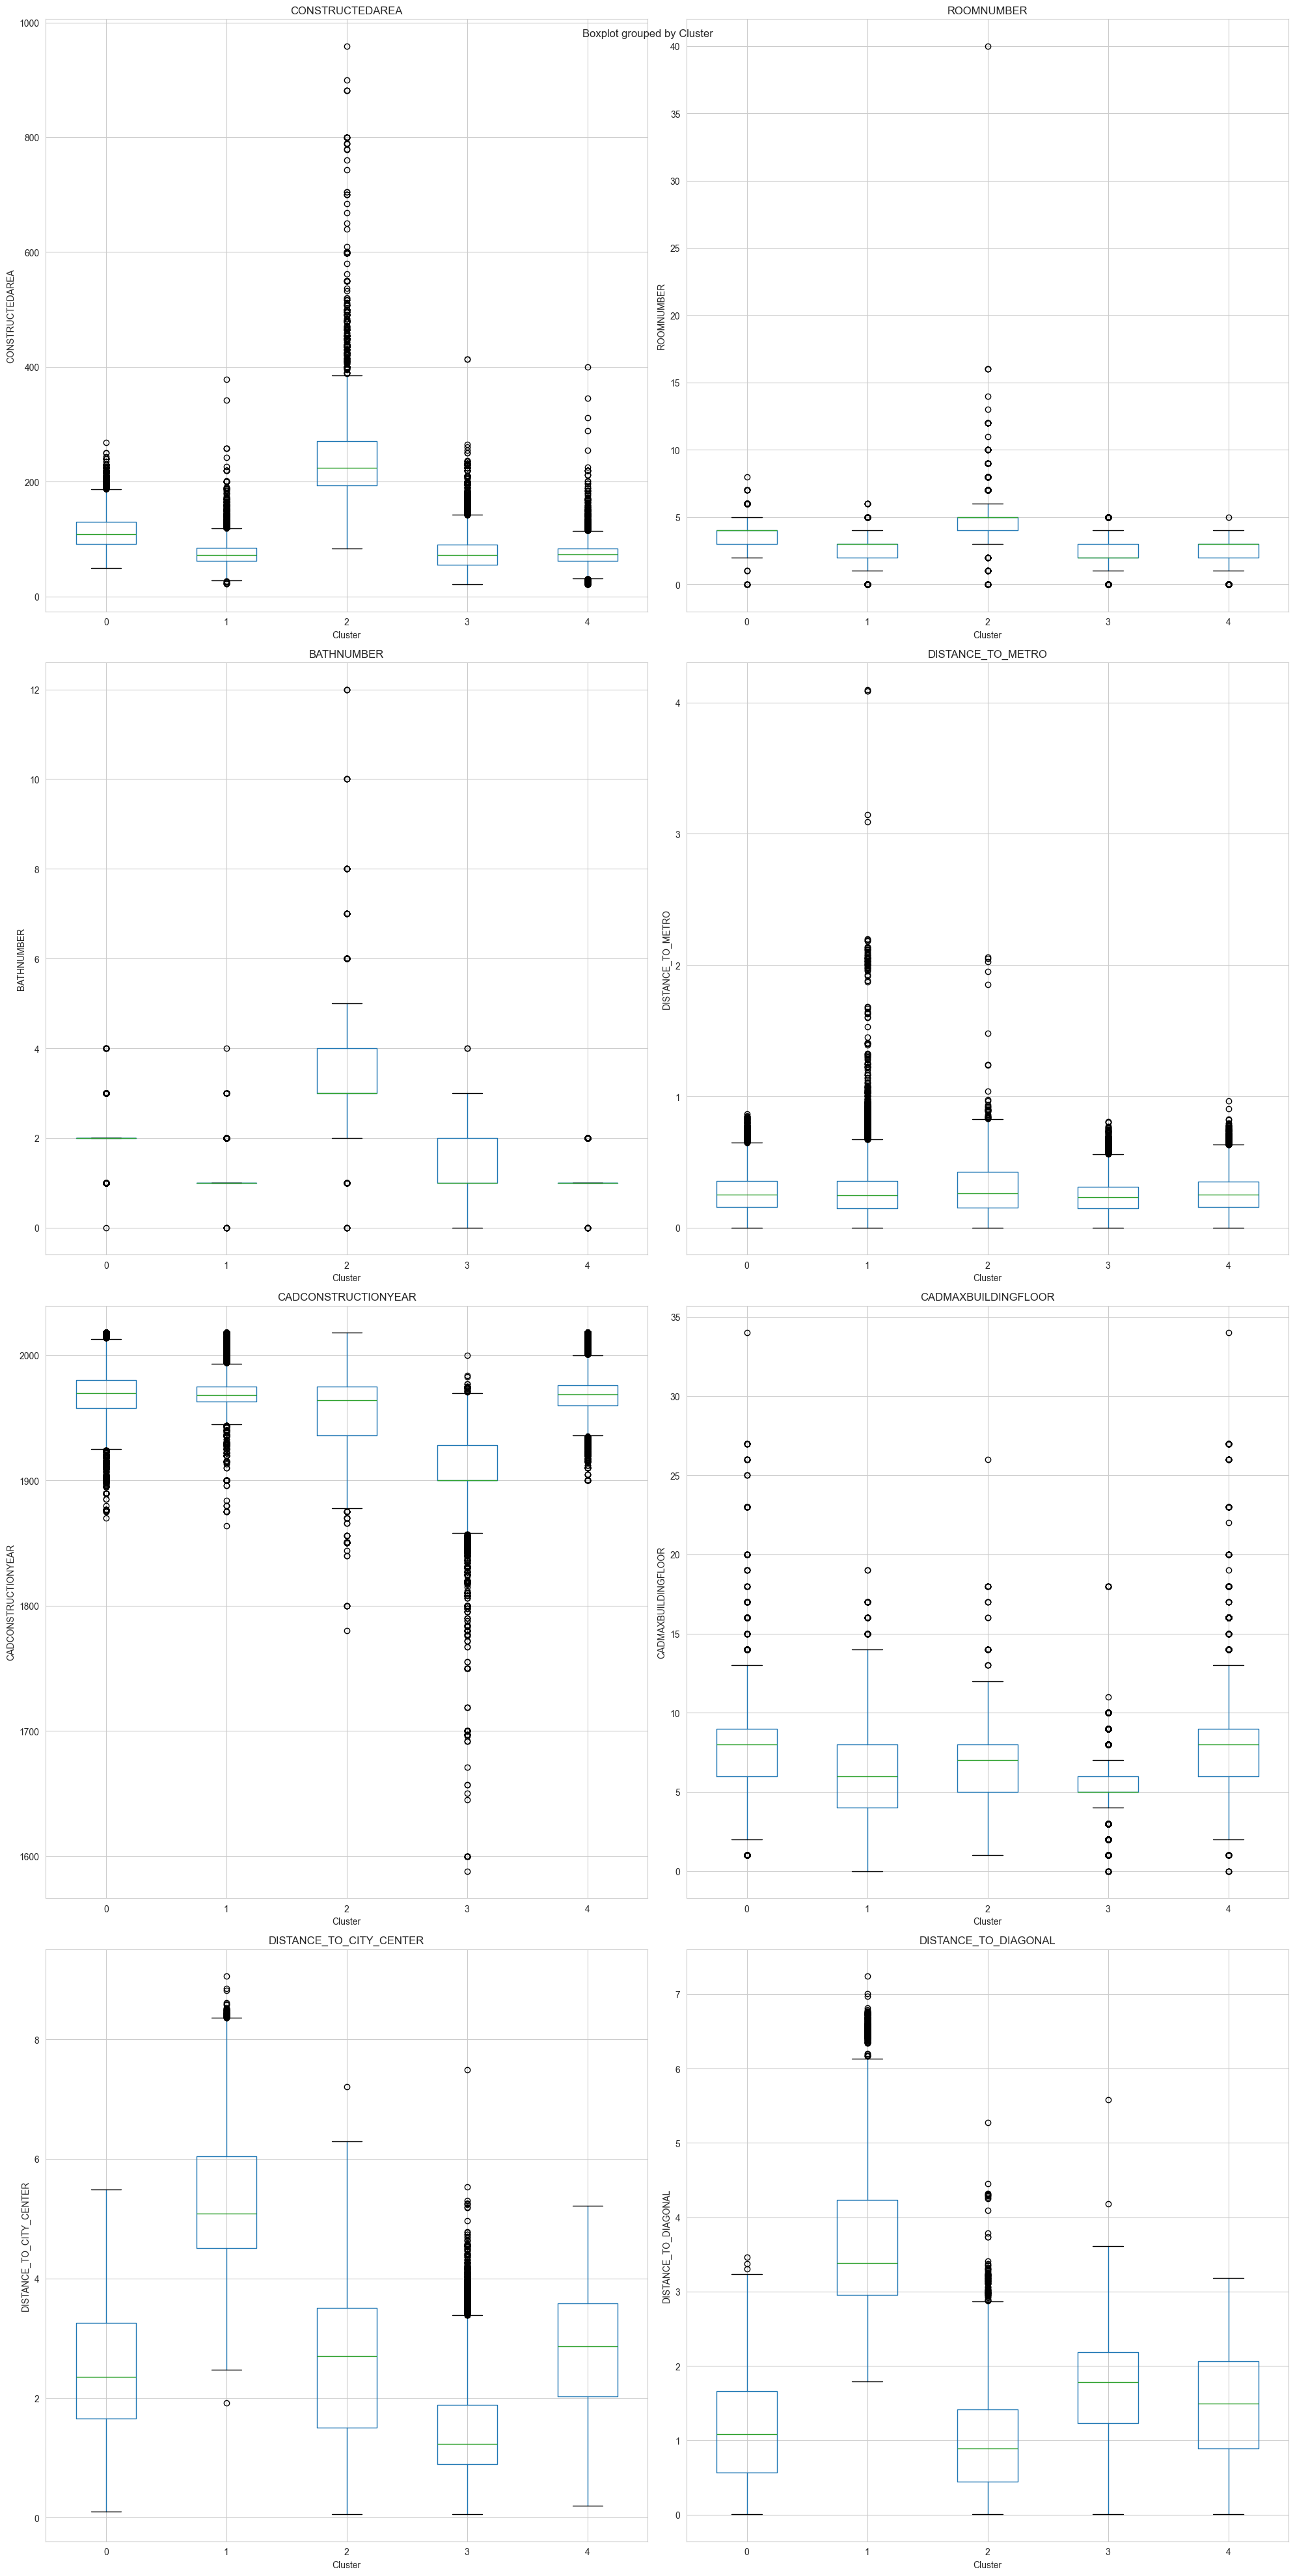

In [41]:
# Select relevant features for clustering
relevant_features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'DISTANCE_TO_METRO',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'DISTANCE_TO_CITY_CENTER',
    'DISTANCE_TO_DIAGONAL'
]

# Create a copy of the dataset with only the selected features
cluster_data = barcelona_data[relevant_features].copy()

# Handle missing values (if any)
cluster_data = cluster_data.fillna(cluster_data.mean())

# Standardize the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the original dataset
barcelona_data['Cluster'] = cluster_labels

# Calculate average price for each cluster
cluster_prices = barcelona_data.groupby('Cluster')['PRICE'].mean().sort_values(ascending=False)

print("Average price per cluster:")
print(cluster_prices)

# Visualize clusters using boxplots
plt.figure(figsize=(15, 10))
barcelona_data.boxplot(column='PRICE', by='Cluster')
plt.title('Distribution of Prices Across Clusters')
plt.suptitle('')  # This removes the automatic suptitle added by pandas
plt.ylabel('Price')
plt.show()

# Analyze cluster characteristics
cluster_summary = barcelona_data.groupby('Cluster')[relevant_features + ['PRICE']].mean()
print("\nCluster characteristics:")
print(cluster_summary)

# Feature importance in clustering
feature_importance = pd.DataFrame({
    'Feature': relevant_features,
    'Importance': np.sum(np.abs(kmeans.cluster_centers_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature importance in clustering:")
print(feature_importance)

# Visualize all important features across clusters
fig, axes = plt.subplots(4, 2, figsize=(20, 40))
fig.suptitle('Distribution of Features Across Clusters', fontsize=16)

for i, feature in enumerate(relevant_features):
    row = i // 2
    col = i % 2
    barcelona_data.boxplot(column=feature, by='Cluster', ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Analyses across datasets for report

__Summary across periods__

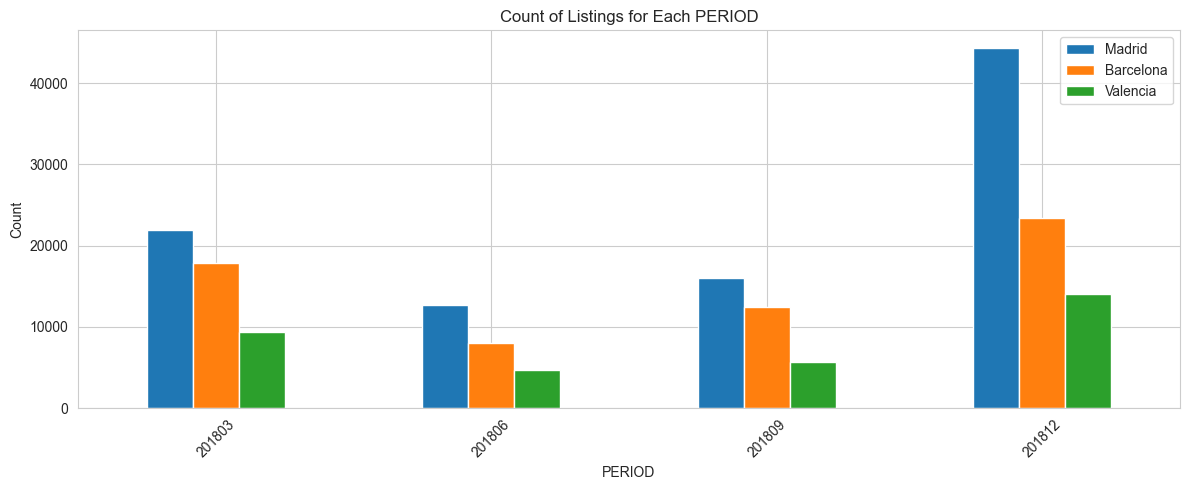

In [42]:
# Function to get period counts for a given dataframe
def get_period_counts(dataframe, city_name):
    period_counts = dataframe['PERIOD'].value_counts().sort_index()
    return period_counts.rename(city_name)

# Get period counts for each city
madrid_counts = get_period_counts(madrid_data, 'Madrid')
barcelona_counts = get_period_counts(barcelona_data, 'Barcelona')
valencia_counts = get_period_counts(valencia_data, 'Valencia')

# Combine counts into a single DataFrame
combined_counts = pd.DataFrame([madrid_counts, barcelona_counts, valencia_counts]).T.fillna(0)

# Plotting grouped bar chart
combined_counts.plot(kind='bar', figsize=(12, 5))
plt.xlabel('PERIOD')
plt.ylabel('Count')
plt.title('Count of Listings for Each PERIOD')
plt.xticks(rotation=45)
plt.grid(True)  # Optionally enable gridlines
plt.tight_layout()
plt.show()

__Summary of missing values__

In [43]:
# Create a dictionary to hold the datasets
datasets = {
    'Madrid': madrid_data,
    'Valencia': valencia_data,
    'Barcelona': barcelona_data
}

# Create an empty DataFrame to hold the percentage of missing values
missing_values_table = pd.DataFrame()

# Calculate the percentage of missing values for each dataset
for city, data in datasets.items():
    missing_percentage = data.isnull().mean() * 100
    missing_values_table[city] = missing_percentage

# Round the percentages to 2 decimal places
missing_values_table = missing_values_table.round(10)

# Display the resulting table
print(missing_values_table)

                                  Madrid   Valencia  Barcelona
ASSETID                         0.000000   0.000000   0.000000
PERIOD                          0.000000   0.000000   0.000000
PRICE                           0.000000   0.000000   0.000000
UNITPRICE                       0.000000   0.000000   0.000000
CONSTRUCTEDAREA                 0.000000   0.000000   0.000000
ROOMNUMBER                      0.000000   0.000000   0.000000
BATHNUMBER                      0.000000   0.000000   0.000000
HASTERRACE                      0.000000   0.000000   0.000000
HASLIFT                         0.000000   0.000000   0.000000
HASAIRCONDITIONING              0.000000   0.000000   0.000000
AMENITYID                       0.000000   0.000000   0.000000
HASPARKINGSPACE                 0.000000   0.000000   0.000000
ISPARKINGSPACEINCLUDEDINPRICE   0.000000   0.000000   0.000000
PARKINGSPACEPRICE               0.000000   0.000000   0.000000
HASNORTHORIENTATION             0.000000   0.000000   0

# Print distribution of target variable price for each city

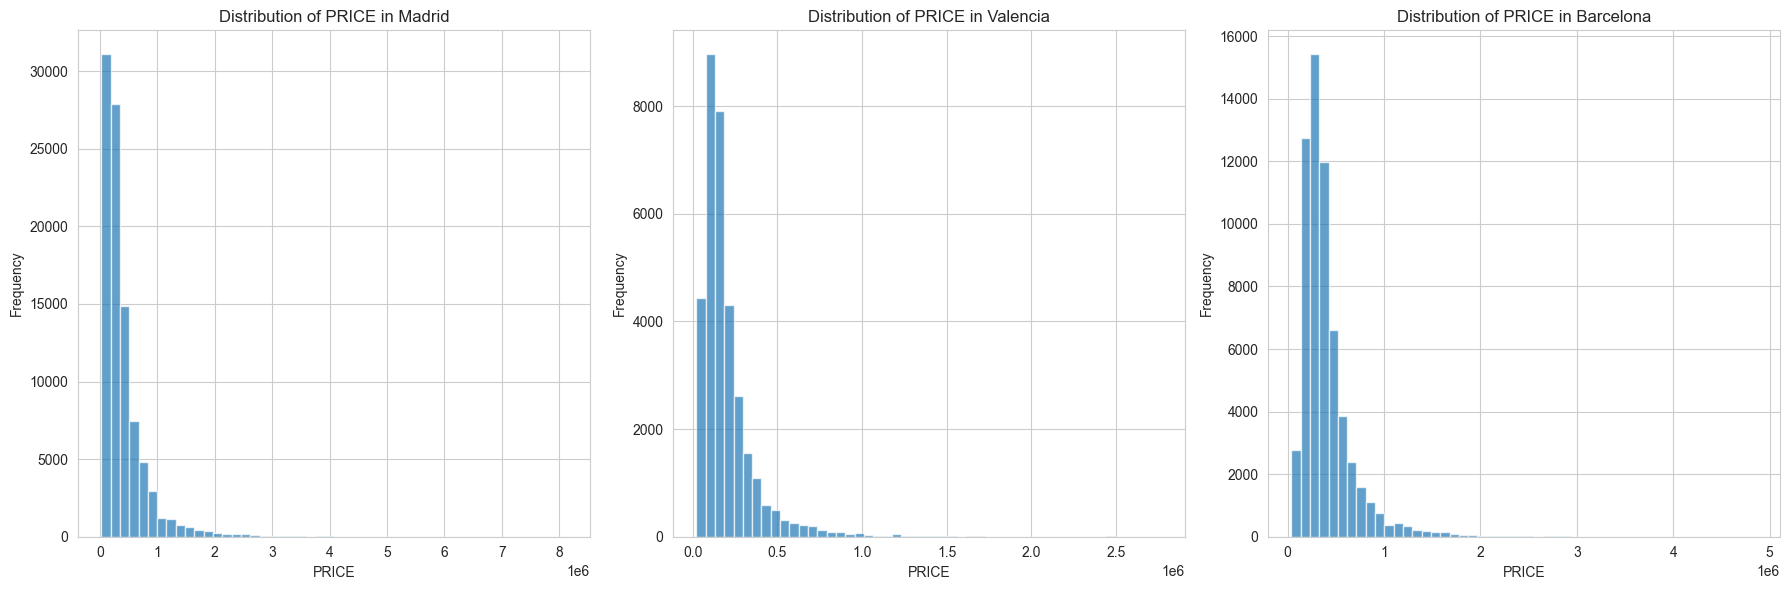

In [44]:
# Create a dictionary to hold the datasets
datasets = {
    'Madrid': madrid_data,
    'Valencia': valencia_data,
    'Barcelona': barcelona_data
}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Function to plot the distribution of the PRICE variable
def plot_price_distribution(ax, city, data):
    ax.hist(data['PRICE'].dropna(), bins=50, alpha=0.7)
    ax.set_title(f'Distribution of PRICE in {city}')
    ax.set_xlabel('PRICE')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Plot the distribution for each city in the respective subplot
for ax, (city, data) in zip(axes, datasets.items()):
    plot_price_distribution(ax, city, data)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\hanten carlotta\AppData\Local\Temp\ipykernel_39104\1293274029.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=labels, notch=True, patch_artist=True)


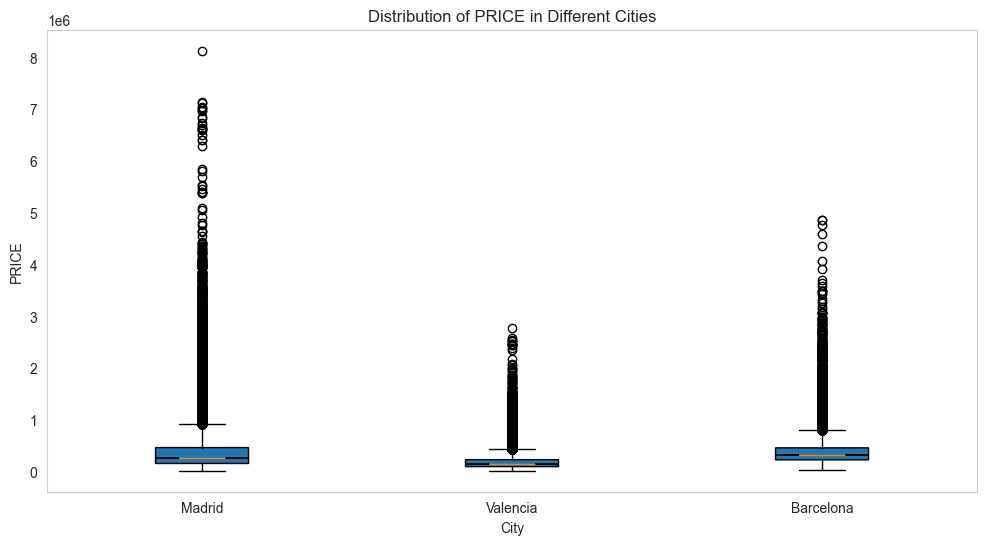

In [45]:
# Create a dictionary to hold the datasets
datasets = {
    'Madrid': madrid_data,
    'Valencia': valencia_data,
    'Barcelona': barcelona_data
}

# Prepare data for boxplot
price_data = [data['PRICE'].dropna() for data in datasets.values()]
labels = datasets.keys()

# Create a figure for the boxplot
plt.figure(figsize=(12, 6))

# Plot the boxplot
plt.boxplot(price_data, labels=labels, notch=True, patch_artist=True)

# Set title and labels
plt.title('Distribution of PRICE in Different Cities')
plt.xlabel('City')
plt.ylabel('PRICE')

# Turn off the grid
plt.grid(False)

# Show the plot
plt.show()